# TME 4/5 - Théorie des sous-ensembles flous et logique floue

Réalisé par :
- BENHADDAD Sabrina
- BENSIDHOUM Azzedine


L'objectif de ce TME est d'implémenter quelques outils de manipulation, ensemblistes ou logiques, des sous-ensembles flous (sef).

## Opérations de base

In [ ]:
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## 1. Représentation des sous-ensembles flous

In [ ]:
sef_triangulaire = [(1,0),(4,1),(6,0)]
sef_trapezoidal = [(1,0),(4,1),(6,1),(8,0)]
sef_quelconque = [(1,0),(4,1),(6,0.6),(7,0.3),(9,1),(10,0.5),(15,0)]

In [ ]:
# mise des sefs sous forme d'un dictionnaire
dict_sefs = {"sef triangulaire": sef_triangulaire,
        "sef trapezoidal" : sef_trapezoidal,
        "sef quelconque" : sef_quelconque}

## 2. Opérations de base

1. Écrire la fonction permettant de calculer le degré d'appartenance de tout point de l'univers à un sous-ensemble flou

In [ ]:
def degre_appartenance(points_inflection, x):
  """
  Fonction permettant de calculer le degré d'appartenance d'un point de l'univers par rapport au sef

    Params:
      sef : liste des points d'inflection du sef triée dans l'ordre
      x : le point a considérer

    Return:
      deg : le degré d'appartenance du point x en fonction du sef
  """

  premier_point_inflection = points_inflection[0][0]
  dernier_point_inflection = points_inflection[-1][0]

  if x < premier_point_inflection or x > dernier_point_inflection:
    return 0


  for index, (point, deg) in enumerate(points_inflection):
    if x == point: # si le point correspond a un point d'inflection, renvoyer le degré correspondant
      return deg
    else: # sinon, calculer la pente de la droite et l'ordonnée a l'origine (car fonction lineaire par morceau)
          # et renvoyer la valeur correspondant a la droite correspondante
      point_suivant, deg_suivant = points_inflection[index+1]
      if x >= point and x <= point_suivant:
        a = (deg_suivant - deg) / (point_suivant - point)
        b = deg - (a * point)
        return round(a * x + b, 2)

In [ ]:
#Tests : la fonction nous donne effectivement de bons résultats
print(degre_appartenance(sef_quelconque, 12))
print(degre_appartenance(sef_triangulaire, 12))

0.3
0


2. Fonction de visualisation

In [ ]:
def visualisation_sefs(dict_sefs, taille_par_subplot_x, taille_par_subplot_y):
  """
  Fonction permettant de visualiser plusieurs sous ensemble flous

    Params:
      dict_sefs: dictionnaire contenant tous les sefs, sous forme d'une liste de points d'inflections triés dans l'ordre

    Return: rien, affiche seulement les sous-ensembles flous
  """
  # tailles en inch et non en cms
  figsize_x = taille_par_subplot_x * len(dict_sefs)
  figsize_y = taille_par_subplot_y * len(dict_sefs)
  plt.figure(figsize = (figsize_x, figsize_y))

  subplot_size = round(len(dict_sefs) / 2) + 1

  i = 1
  for sef, points_inflection in dict_sefs.items():
    x_s = [point[0] for point in points_inflection]
    y_s = [point[1] for point in points_inflection]
    plt.subplot(subplot_size, 2, i)
    plt.plot(x_s, y_s)
    plt.title(sef)
    i += 1

  plt.axis();

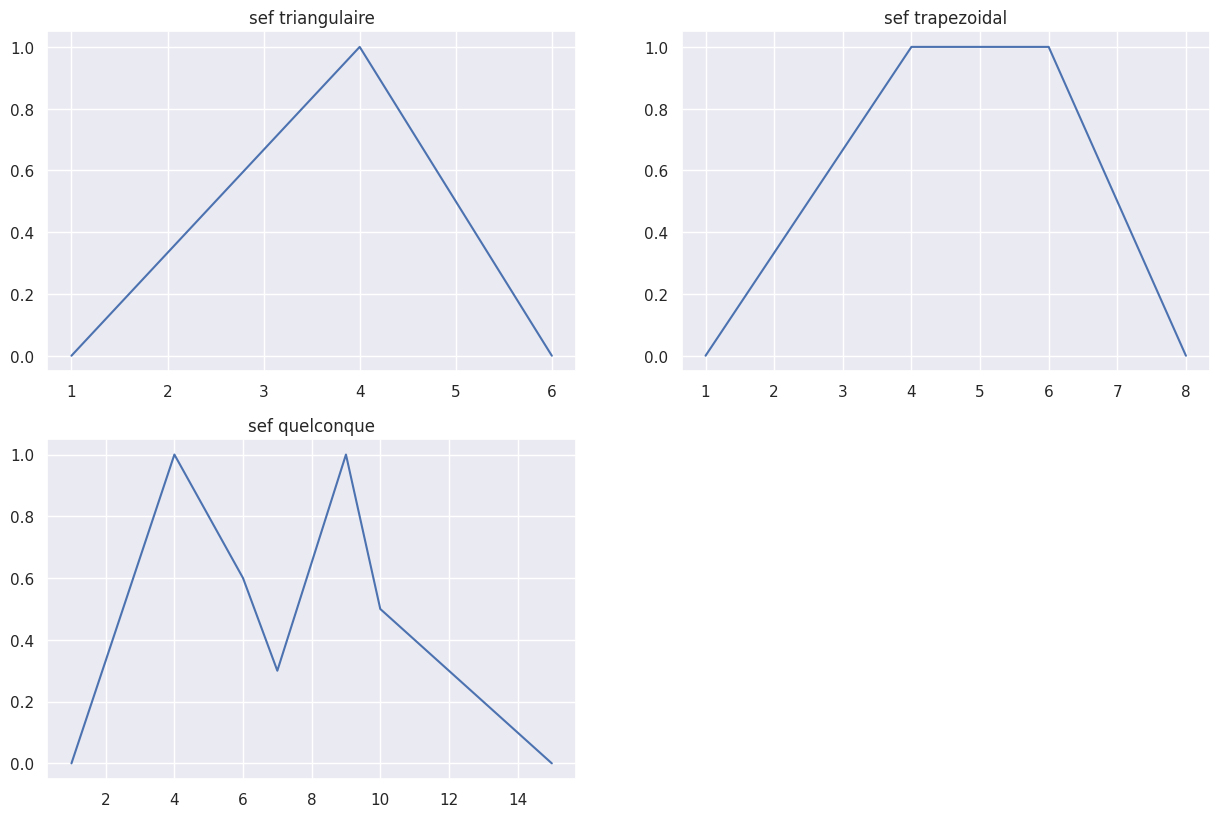

In [ ]:
#Test de la visualisation
visualisation_sefs(dict_sefs, 5, 5)

## 3. Opération ensemblistes

1. Complémentaire d'un sef fourni

In [ ]:
def sef_complementaire(points_inflection):
  """
  Fonction permettant de calculer le complémentaire d'un sef: ses points d'inflection

    Params:
      points_inflection : les points d'inflection du sef

    Return:
      points_inflection_complementaire : les points d'inflection du sef complémentaire
  """

  point_inflection_complementaire = []

  for point, deg in points_inflection:
    point_inflection_complementaire.append((point, 1 - deg))

  return point_inflection_complementaire

In [ ]:
triangle_comp = sef_complementaire(sef_triangulaire)
print(f"Sef triangulaire : {sef_triangulaire} \nSon complémentaire : {triangle_comp}")

Sef triangulaire : [(1, 0), (4, 1), (6, 0)] 
Son complémentaire : [(1, 1), (4, 0), (6, 1)]


In [ ]:
dict_comp = {"sef triangulaire" : sef_triangulaire,
             "Complémentaire sef triangulaire" : triangle_comp,
             "sef trapezoidal" : sef_trapezoidal,
             "Complémentaire sef trapezoidal " : sef_complementaire(sef_trapezoidal),
             "sef quelconque " : sef_quelconque,
             "Complémentaire sef quelconque ": sef_complementaire(sef_quelconque)}

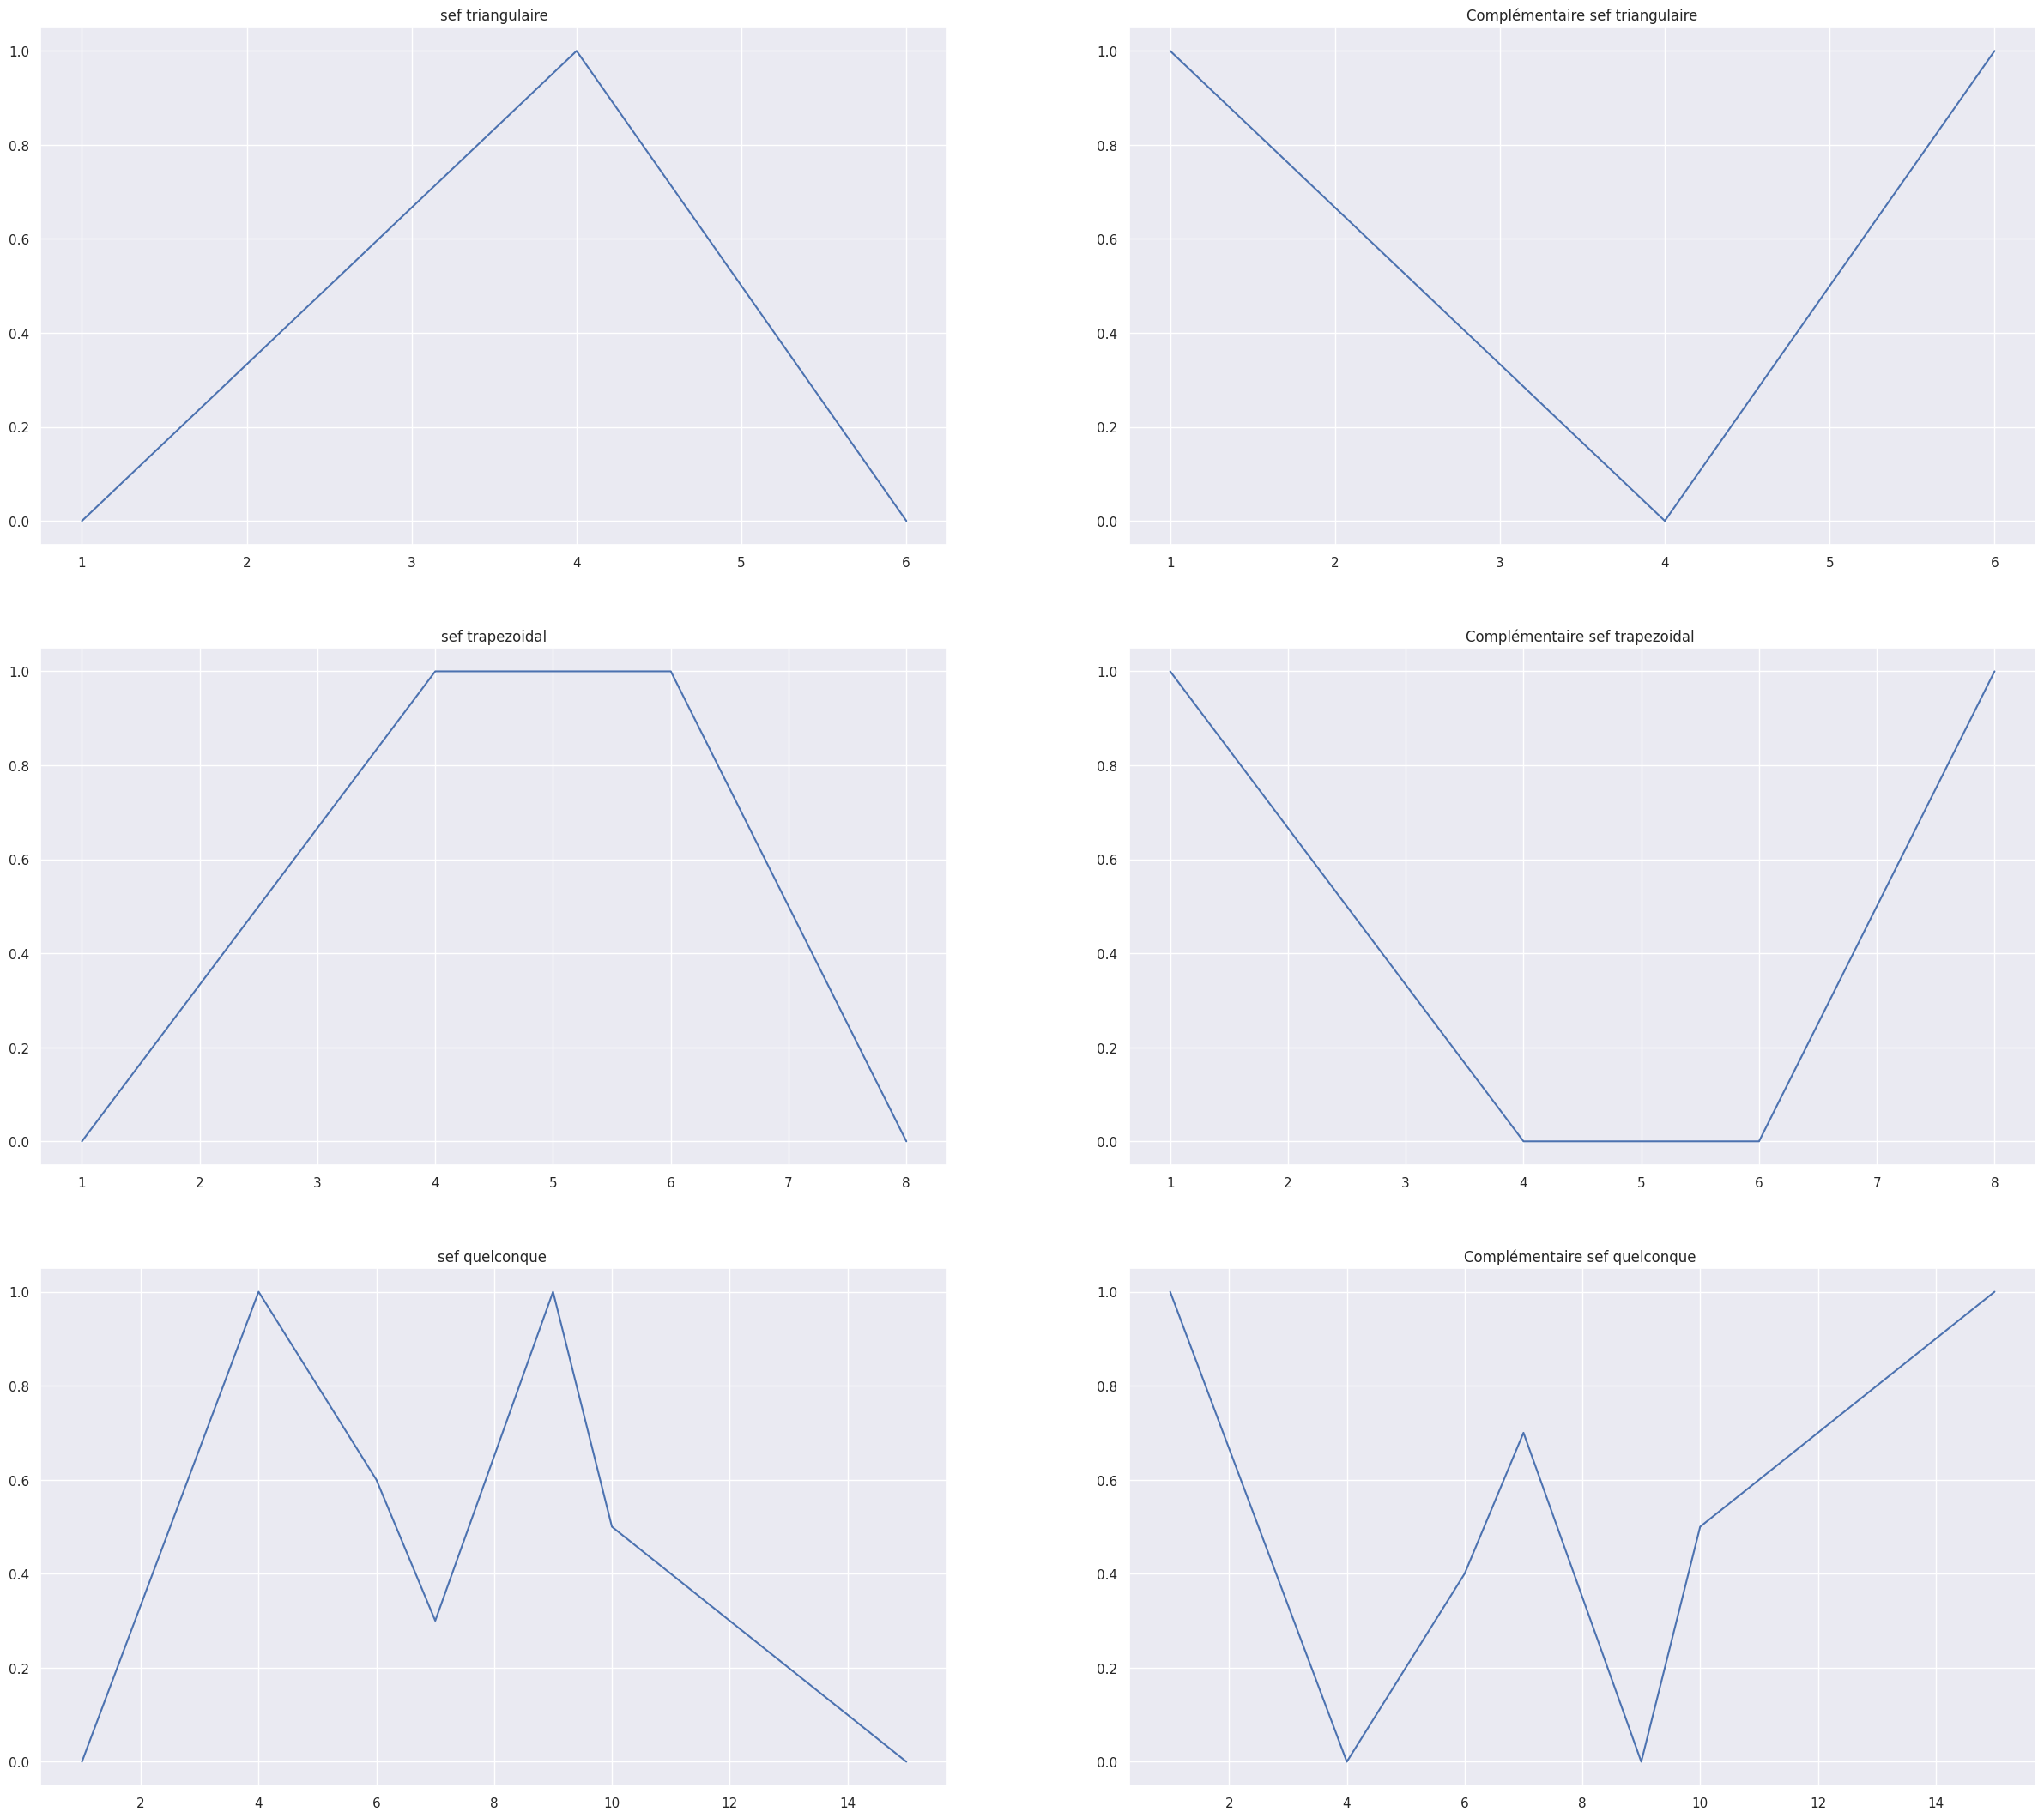

In [ ]:
visualisation_sefs(dict_comp,5, 6)

2. Représenter des t-normes et t-conormes

A. T_normes :

In [ ]:
class TNorme:
  def __init__(self,debut_interval, fin_interval, points_inflection_A, points_inflection_B,u = None,v = None):
    self.A = points_inflection_A
    self.B = points_inflection_B
    self.debut_interval = debut_interval
    self.fin_interval = fin_interval


  def zadeh(self):
    taille_interval = self.fin_interval - self.debut_interval
    points_interval = np.linspace(self.debut_interval, self.fin_interval, taille_interval * 100)

    points = []
    for point in points_interval:
      points.append((point, min(degre_appartenance(self.A, point), degre_appartenance(self.B, point))))

    return points

  def lukasiewick(self):
    taille_interval = self.fin_interval - self.debut_interval
    points_interval = np.linspace(self.debut_interval, self.fin_interval, taille_interval * 1000)

    points = []
    for point in points_interval:
      u = degre_appartenance(self.A, point)
      v = degre_appartenance(self.B, point)
      points.append((point, max(0, u+v-1)))

    return points

  def probabiliste(self):
    taille_interval = self.fin_interval - self.debut_interval
    points_interval = np.linspace(self.debut_interval, self.fin_interval, taille_interval * 1000)

    points = []
    for point in points_interval:
      u = degre_appartenance(self.A, point)
      v = degre_appartenance(self.B, point)
      points.append((point, u*v))

    return points


In [ ]:
t_norme = TNorme(debut_interval= 1, fin_interval= 8,
                 points_inflection_A = dict_sefs["sef triangulaire"],
                 points_inflection_B = dict_sefs["sef trapezoidal"])

dict_tnormes = {"min sef triangulaire trapezoidal" : t_norme.zadeh(),
                "lukasiewick sef triangulaire trapezoidal" : t_norme.lukasiewick(),
                "produit sef triangulaire trapezoidal" : t_norme.probabiliste()
}


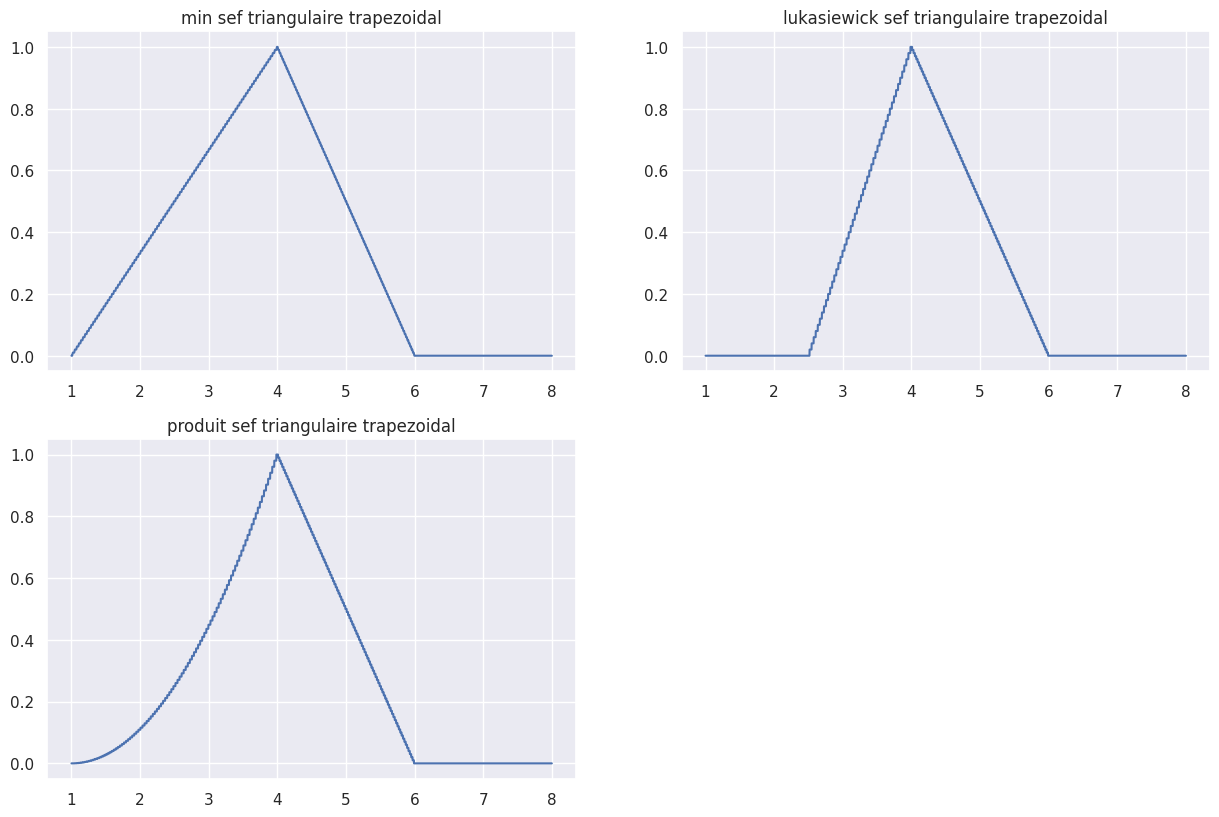

In [ ]:
visualisation_sefs(dict_tnormes, 5, 5)

B. T_Conormes

In [ ]:
class TConorme:
  def __init__(self, debut_interval, fin_interval ,points_inflection_A, points_inflection_B):
    self.A = points_inflection_A
    self.B = points_inflection_B
    self.debut_interval = debut_interval
    self.fin_interval = fin_interval


  def zadeh (self):
    taille_interval = self.fin_interval - self.debut_interval
    points_interval = np.linspace(self.debut_interval, self.fin_interval, taille_interval * 100)

    points = []
    for point in points_interval:
      u = degre_appartenance(self.A, point)
      v = degre_appartenance(self.B, point)
      points.append((point, max(u, v)))

    return points

  def probabiliste(self):
    taille_interval = self.fin_interval - self.debut_interval
    points_interval = np.linspace(self.debut_interval, self.fin_interval, taille_interval * 100)

    points = []
    for point in points_interval:
      u = degre_appartenance(self.A, point)
      v = degre_appartenance(self.B, point)
      points.append((point, u+v - u*v))

    return points

  def lukasiewick(self):
    taille_interval = self.fin_interval - self.debut_interval
    points_interval = np.linspace(self.debut_interval, self.fin_interval, taille_interval * 100)

    points = []
    for point in points_interval:
      u = degre_appartenance(self.A, point)
      v = degre_appartenance(self.B, point)
      points.append((point, min(1, u+v)))

    return points

In [ ]:
t_conorme = TConorme(debut_interval= 1, fin_interval= 8,
                 points_inflection_A = dict_comp["Complémentaire sef triangulaire"],
                 points_inflection_B = dict_comp["sef trapezoidal"])

dict_tconormes = {'max complementaire sef triangulaire trapezoidal' : t_conorme.zadeh(),
                  'sef probabiliste triangulaire trapezoidal' : t_conorme.probabiliste(),
                  'lukasiewick sef triangulaire trapezoidal' : t_conorme.lukasiewick()
}

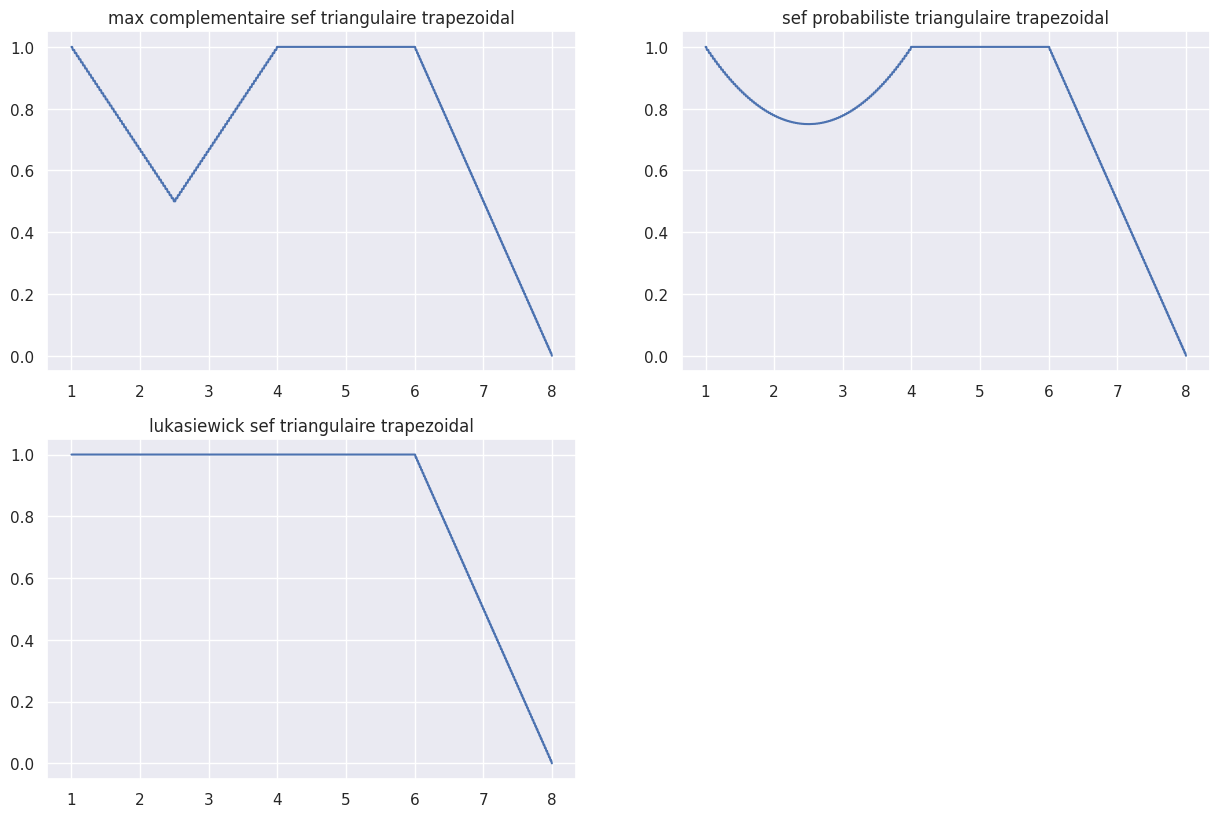

In [ ]:
visualisation_sefs(dict_tconormes, 5, 5)

3 et 4. Fonctions d'intersections et d'unions / Observation de la préservation/abandon des propriétés de non-contradiction et de tiers exclu

In [ ]:
complementaire_sef_triangulaire = sef_complementaire(sef_triangulaire)
tnorme_triangulaire = TNorme(0,10,sef_triangulaire, complementaire_sef_triangulaire)
dict_tnorme_triangulaire = {}
dict_tnorme_triangulaire["min"] = tnorme_triangulaire.zadeh()

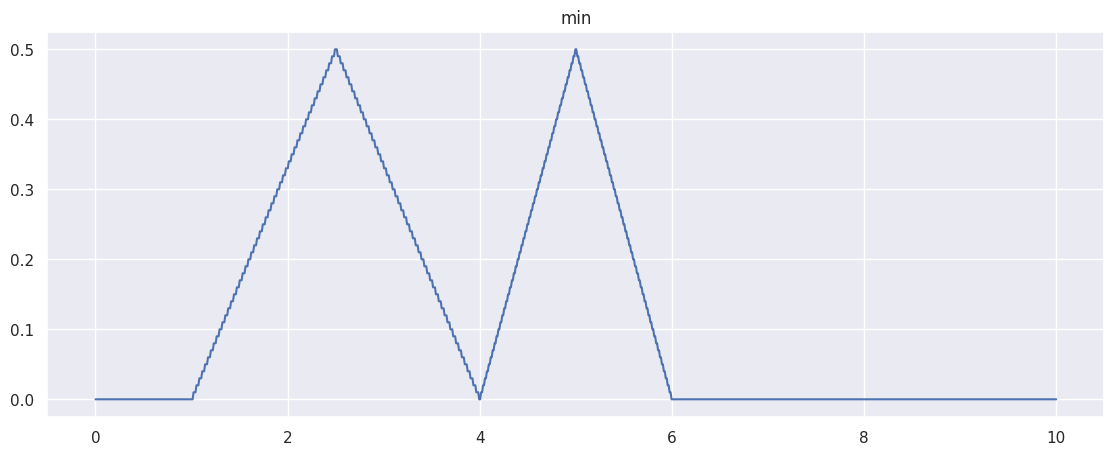

In [ ]:
visualisation_sefs(dict_tnorme_triangulaire, taille_par_subplot_x=30, taille_par_subplot_y=5)

On peut observer que le principe de non contradiction n'est pas préservé.

In [ ]:
tconorme_triangulaire2 = TConorme(0,10,sef_triangulaire, complementaire_sef_triangulaire)
tconorme_triangulaire2_max = tconorme_triangulaire2.zadeh()

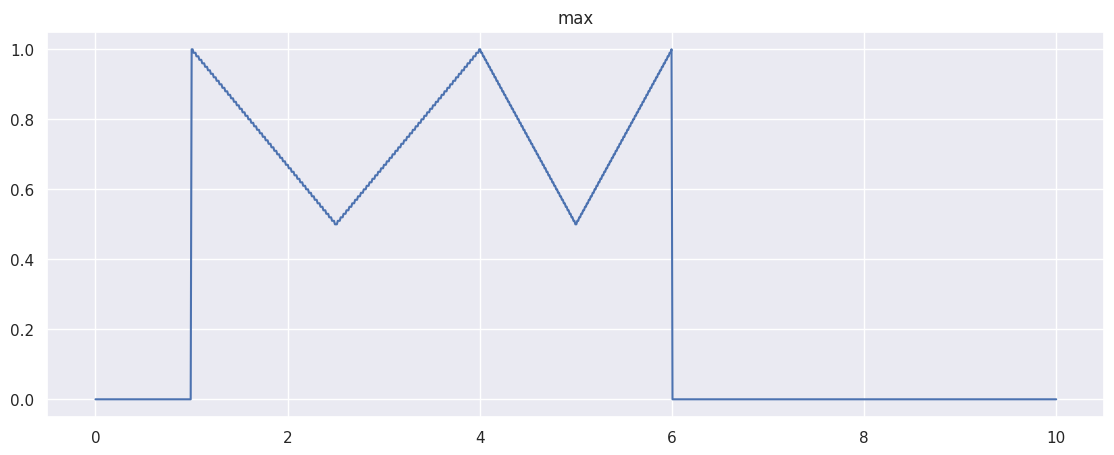

In [ ]:
visualisation_sefs({"max" : tconorme_triangulaire2_max}, taille_par_subplot_x=30, taille_par_subplot_y=5)

On peut observer que le principe de tiers exclu n'est pas préservé.

## 4. Principe d'extension


1. Classe Φ : permettant de représenter une fonction mathématique considérée pour l'extension

In [ ]:
class Phi:

  def __init__(self, fonction, antecedent):
    self.fonction = fonction
    self.antecedent = antecedent

  def calcule(self, x):
    return self.fonction(x)

  def antecedent(self, y):
    return self.antecedent(y)

  def extension(self, points_inflection, interval):
    """

      Params:
        points_inflection : liste des points d'inflection du sef, triés dans l'ordre
        interval : interval du sef a considérer
    """

    interval_image = self.calcule(interval[0]),  self.calcule(interval[1])
    taille_interval = interval_image[1] - interval_image[0]
    points_interval = np.linspace(interval_image[0], interval_image[1], taille_interval * 10000)

    points = []
    for point in points_interval:
      if self.antecedent(point) == []:
        points.append(0)
      else:
        points.append((point, max([degre_appartenance(points_inflection, x) for x in self.antecedent(point)])))

    return points

2. Définir la fonction d'extension

In [ ]:
def carre(x):
  return x**2

def inverse_carre(y):
  if y < 0:
    return []
  else:
    return [math.sqrt(y), - math.sqrt(y)]

In [ ]:
fonction_carre = Phi(carre, inverse_carre)
sef_triangulaire = [(2,0), (3,1), (4,0)]

In [ ]:
dict_ = {"my_result":  fonction_carre.extension(sef_triangulaire, (0, 5))}

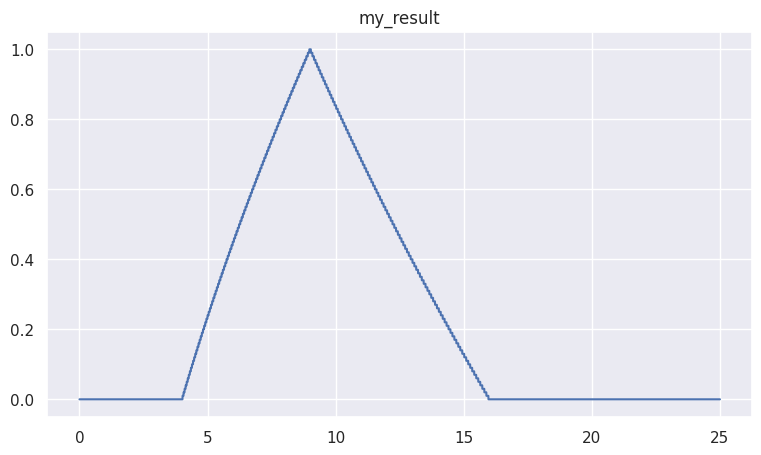

In [ ]:
visualisation_sefs(dict_, 20, taille_par_subplot_y=5)

## 5. Opérations logiques

Implémentation des opérateurs : fonctions d'implication floue

Pour ce faire, nous allons implémenter la classe **f_implication**

In [ ]:
class f_implication:

  def __init__(self,u,v):
    self.u = u
    self.v = v

  def brower_godel(self,x,y):
      if (x <= y) :
        return 1
      else:
          return y

  def goguen(self,x,y):
    if x != 0 :
      return np.minimum(y/x, 1)
    else :
      return 1

  def kleen_d(self,x,y):
    return np.maximum(1-x, y)

  def larsen(self,x,y):
    return x*y

  def luka(self,x,y):
    return np.minimum(1-x + y, 1)

  def mamdani(self,x,y):
    return np.minimum(x,y)

  def reichenbach(self,x,y):
    return 1 - x + x*y

  def willmott(self,x,y):
    return np.maximum(1-x, np.minimum(x,y))

  def rescher(self, x, y):
    if x <= y :
      return 1
    else :
      return 0

### MPG pour une observation précise

1. Écrire la fonction permettant de retrouver le résultat de l'application du MPG sur une observation précise

Dans ce cas nous avons :    
\begin{align}
  f_A^{'}(x) =  \begin{cases}
     1 \,\,si \,\, x = x_0\\
     0 \,\,\,\, sinon
   \end{cases}
\end{align}

In [ ]:
def MDP(A,B,x_0, F,T,interv):
  """
  Fonction qui étant donnée les entrées, renvoie le sous-ensemble flou
  B' résultat de l'application du Modus Ponens Généralisé (cas précis)

  Entrées :
  - A, B : deux sous-ensembles flous
  - x_0 : valeur précise
  - F : fonction d'implication
  - t_norme : t_norme associée à F

  Sortie :
  - le sous-ensemble flou résultant

  """
  #On génére d'abord l'intervalle pour B
  a = degre_appartenance(A,x_0)
  fuzzy_b = []
  for y in interv :
    if T =='lukasiewick':
      result = np.max(1+F(a,degre_appartenance(B,y))-1)
    elif T == 'probabiliste':
      result = F(a,degre_appartenance(B,y))
    elif T == 'zadeh':
      result = np.minimum(1,F(a,degre_appartenance(B,y)))
    fuzzy_b.append((y,result))


  return fuzzy_b

In [ ]:
#Exemple du TD : Exercice 1
A = [(1,0),(2,1),(4,0)]
B = [(3,0),(5,1),(6,0)]

x_0 = 2.5
interv = np.linspace(0,10,100)
implication = f_implication(0,1)

result = MDP(A, B, x_0, implication.luka, 'lukasiewick',interv)

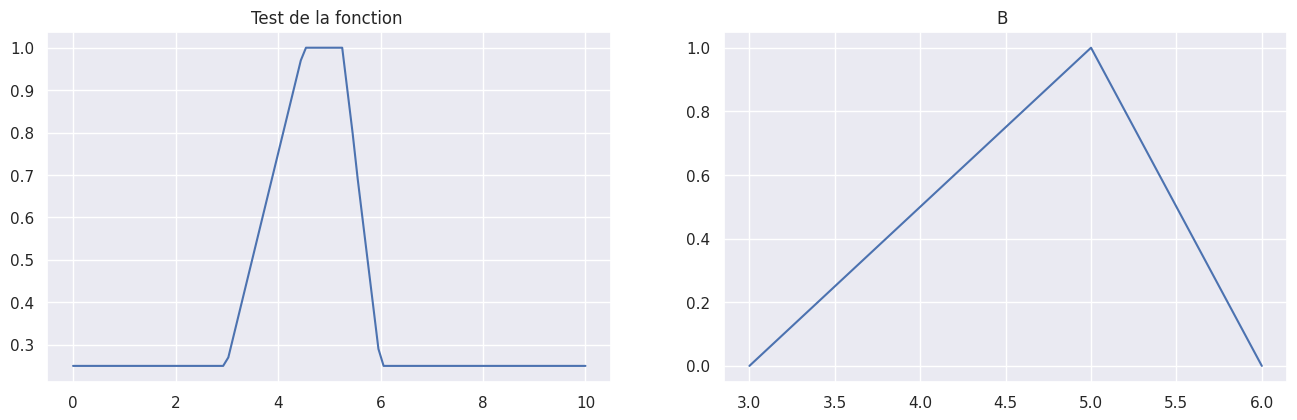

In [ ]:
#Test visualisation
dict_test = {"Test de la fonction ": result,
             "B ": B}
visualisation_sefs(dict_test, taille_par_subplot_x = 8, taille_par_subplot_y=5)

2. Reproduire les graphiques des transparents du cours, T12 à 14

Nous allons donc visualiser le sous-ensemble flou B' résultant du Modus Ponens Généralisé à l'observation précise
\begin{align} x_0 \end{align}

Nous utiliserons toutes les fonctions d'implication vues en cours

In [ ]:
def plot_MDP(A, B, x_0, names, liste_op_imp, T,interv):
    num_columns = 3  # Nombre de sous-graphiques par ligne
    num_rows = math.ceil(len(liste_op_imp) / num_columns)  # Calcul du nombre de lignes nécessaires

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 10))
    colors = ['blue', 'red']

    for i, op in enumerate(liste_op_imp):
        sef = [B]
        label = {str(B): "B"}

        res = MDP(A, B, x_0, op, T,interv)
        label[str(res)] = "Résultat"
        sef.append(res)

        row = i // num_columns  # Calcul de la ligne actuelle
        col = i % num_columns  # Calcul de la colonne actuelle

        for j, s in enumerate(sef):
            x_s = [point[0] for point in s]
            y_s = [degre_appartenance(s, point) for point in x_s]
            axs[row, col].plot(x_s, y_s, color=colors[j], label=label[str(s)])
            axs[row, col].set_title(f"{names[i]}")
            axs[row, col].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
implication = f_implication(0,1)
liste_op_imp = [implication.luka, implication.reichenbach,
                implication.kleen_d, implication.brower_godel,
                implication.goguen, implication.willmott,
                implication.rescher, implication.mamdani,
                implication.larsen]

X_0 =  2.5


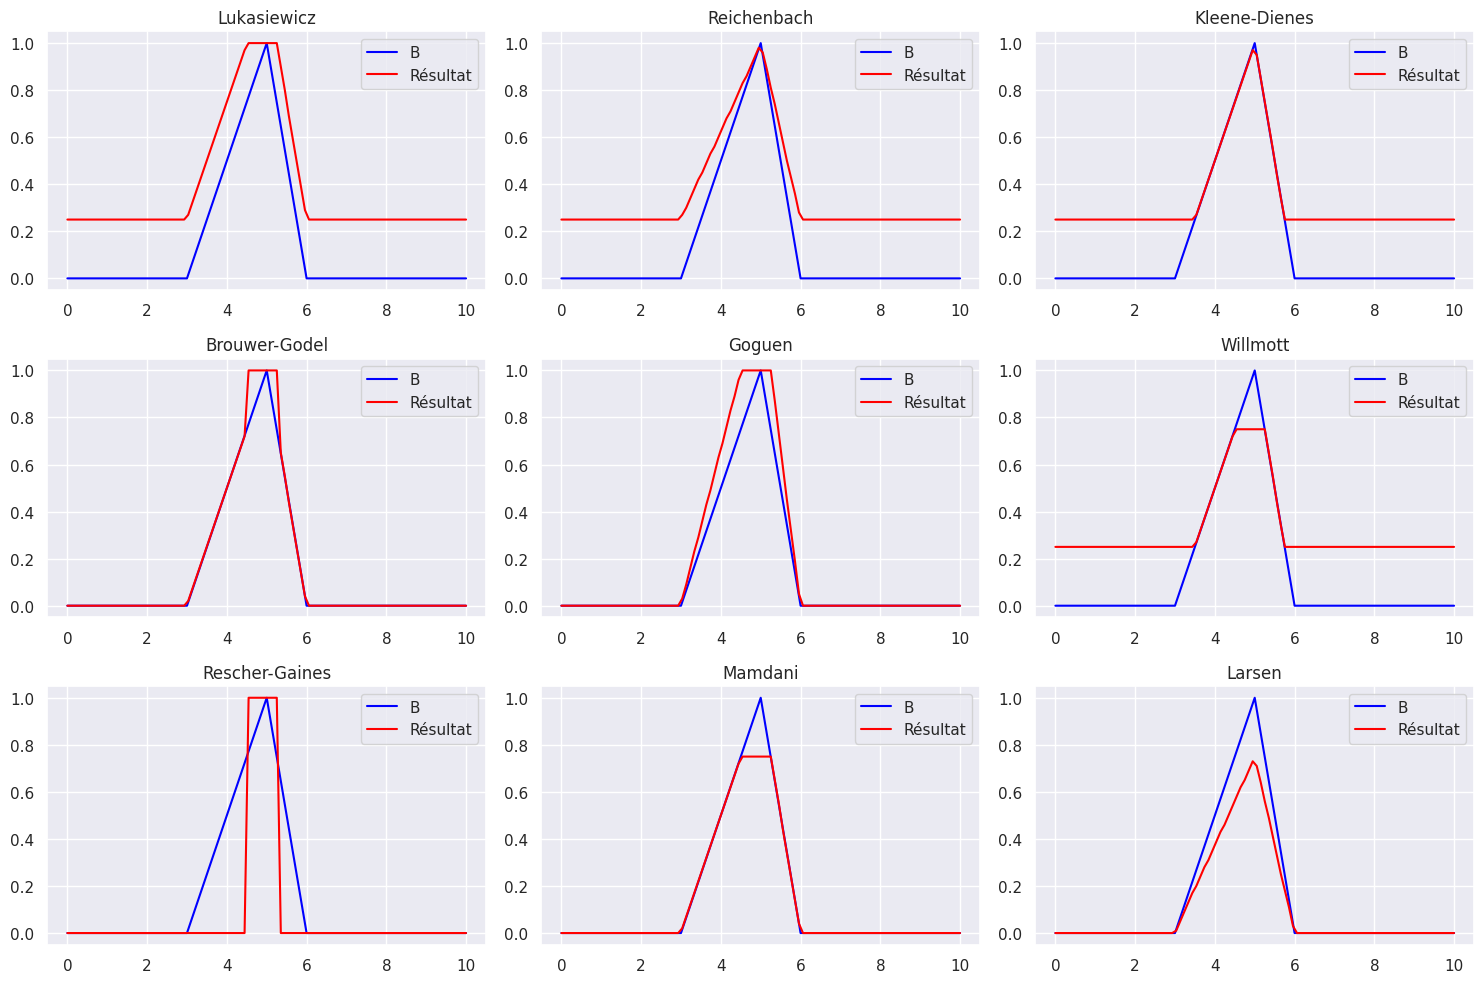

In [ ]:
A = [(1,0),(2,1),(4,0)]
B = [(0,0),(3,0),(5,1),(6,0),(10,0)]
names = ["Lukasiewicz","Reichenbach","Kleene-Dienes","Brouwer-Godel",
         "Goguen", "Willmott", "Rescher-Gaines","Mamdani","Larsen"]


x_0 = 2.5
print("X_0 = ", x_0)

plot_MDP(A,B,x_0,names, liste_op_imp,'lukasiewick',interv)

Cas en dehors de la prémisse :
\begin{align}
\ x_0 = 6 → f_A({x_0}) = 0
\end{align}

X_0 =  6


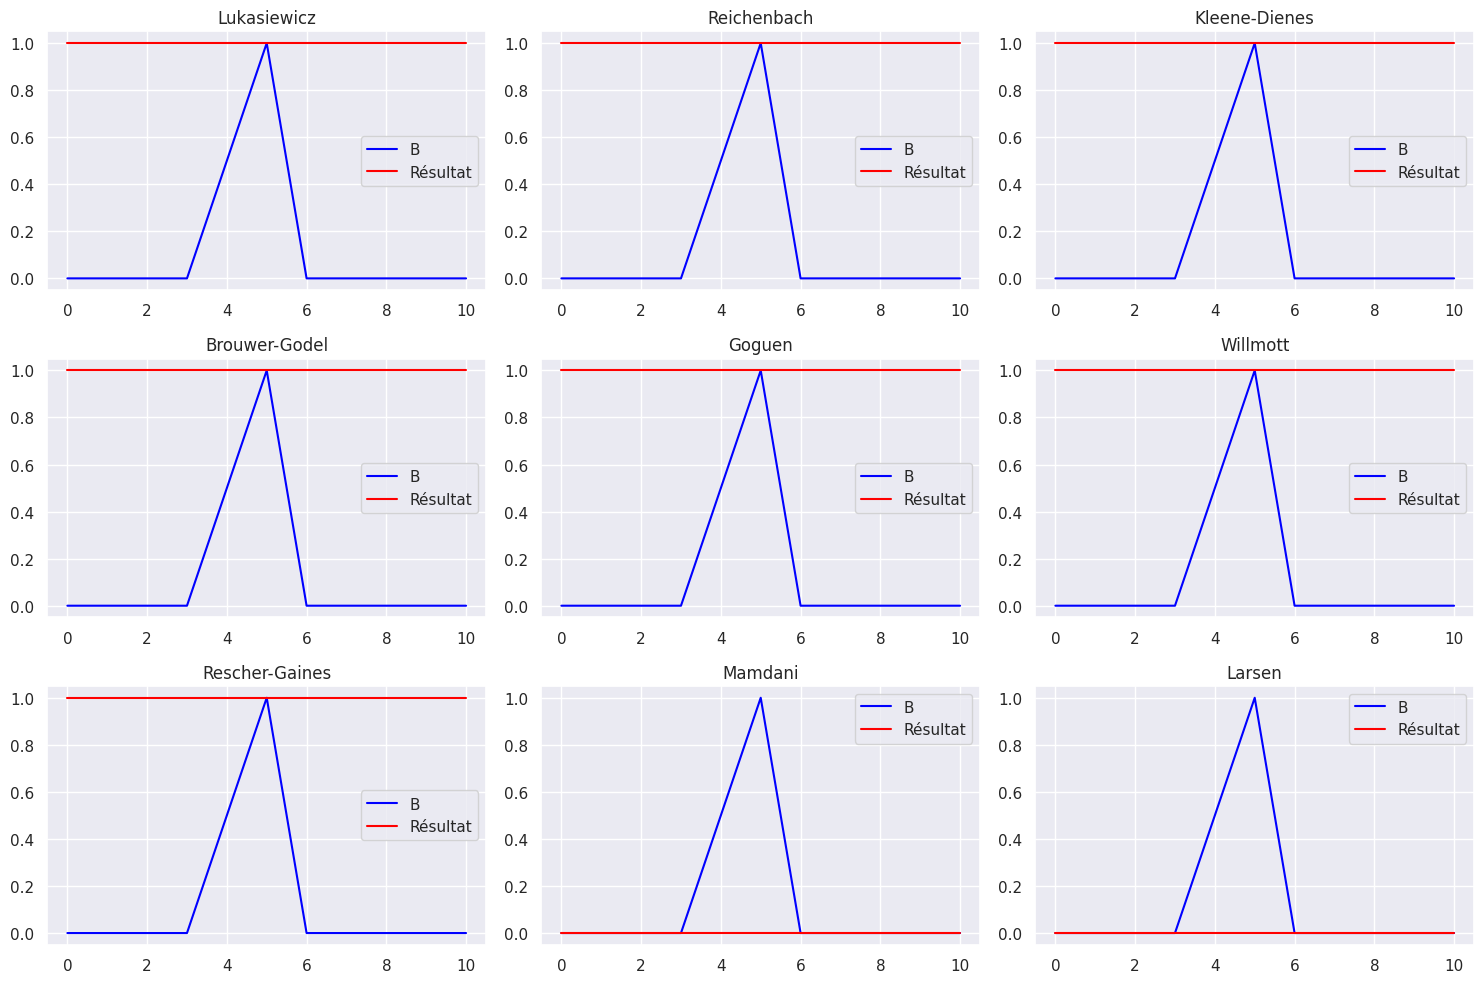

In [ ]:
x_0 = 6
print("X_0 = ", x_0)

plot_MDP(A,B,x_0,names, liste_op_imp,'lukasiewick',interv)

Cas complètement dans la prémisse :   
\begin{align}
\ x_0 = 2 → f_A({x_0}) = 1
\end{align}

X_0 =  2


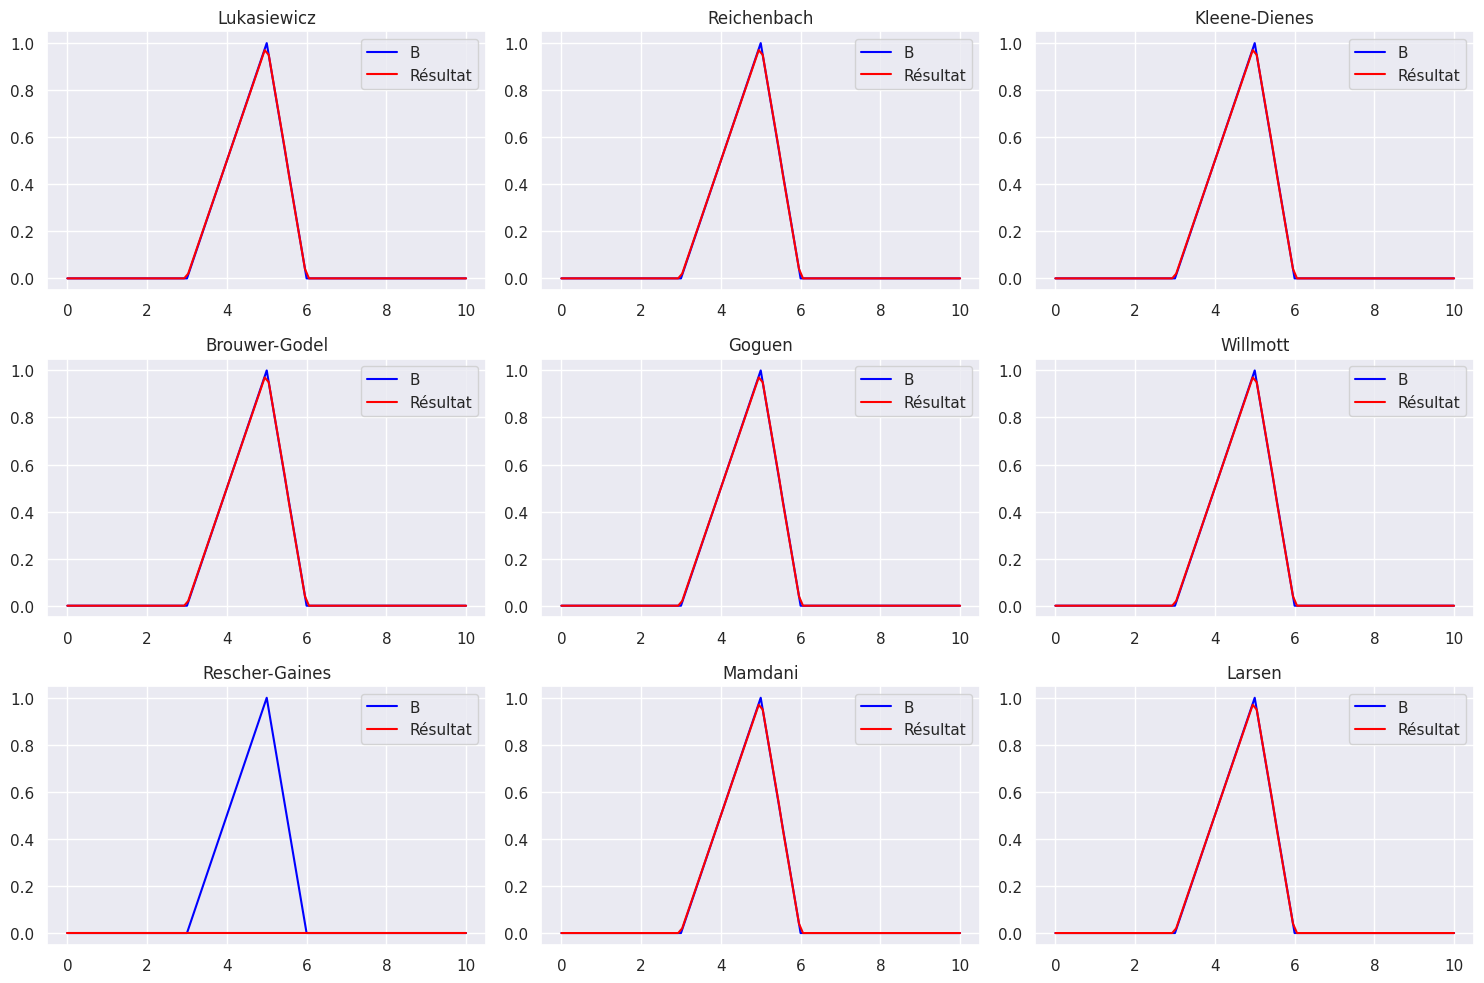

In [ ]:
x_0 = 2
print("X_0 = ", x_0)

plot_MDP(A,B,x_0,names, liste_op_imp,'lukasiewick',interv)

Nous obtenons exactement les mêmes graphiques des transparents du cours

### MPG pour une observation floue

3. Nous nous intéresserons dans ce qui suit à l'implémentation d'un MPG dans le cas général, c'est-à-dire qui considère en entrée non pas une observation précise, mais une observation floue A'

In [ ]:
def MPG(A,B,A_, F,T,interv):
  """
  Fonction qui étant donnée les entrées, renvoie le sous-ensemble flou
  B' résultat de l'application du Modus Ponens Généralisé (cas général)

  Entrées :
  - A, B : deux sous-ensembles flous
  - A_ : observation floue
  - F : fonction d'implication
  - t_norme : t_norme associée à F

  Sortie :
  - le sous-ensemble flou résultant

  """
  #On génére d'abord l'intervalle pour B
  X = np.linspace(0,10,100)
  fuzzy_b = []
  for y in interv :
    sup = []
    for x in X :
      if T =='lukasiewick':
        sup.append(np.max(degre_appartenance(A_,x)+F(degre_appartenance(A,x),degre_appartenance(B,y))-1))
      elif T == 'probabiliste':
        sup.append(degre_appartenance(A_,x) * F(degre_appartenance(A,x),degre_appartenance(B,y)))
      elif T == 'zadeh':
        sup.append(np.minimum(degre_appartenance(A_,x),F(degre_appartenance(A,x),degre_appartenance(B,y))))
    fuzzy_b.append((y,max(sup)))


  return fuzzy_b

In [ ]:
#On reprend le même exemple que tout à l'heure
A = [(2,0),(4,1),(10,0)]
B = [(0,0),(6,1),(8,0)]
A_ = [(0,0),(2,1),(8,0)]

dict_test = {"A" : A,
             "B" : B,
             "A_" : A_}



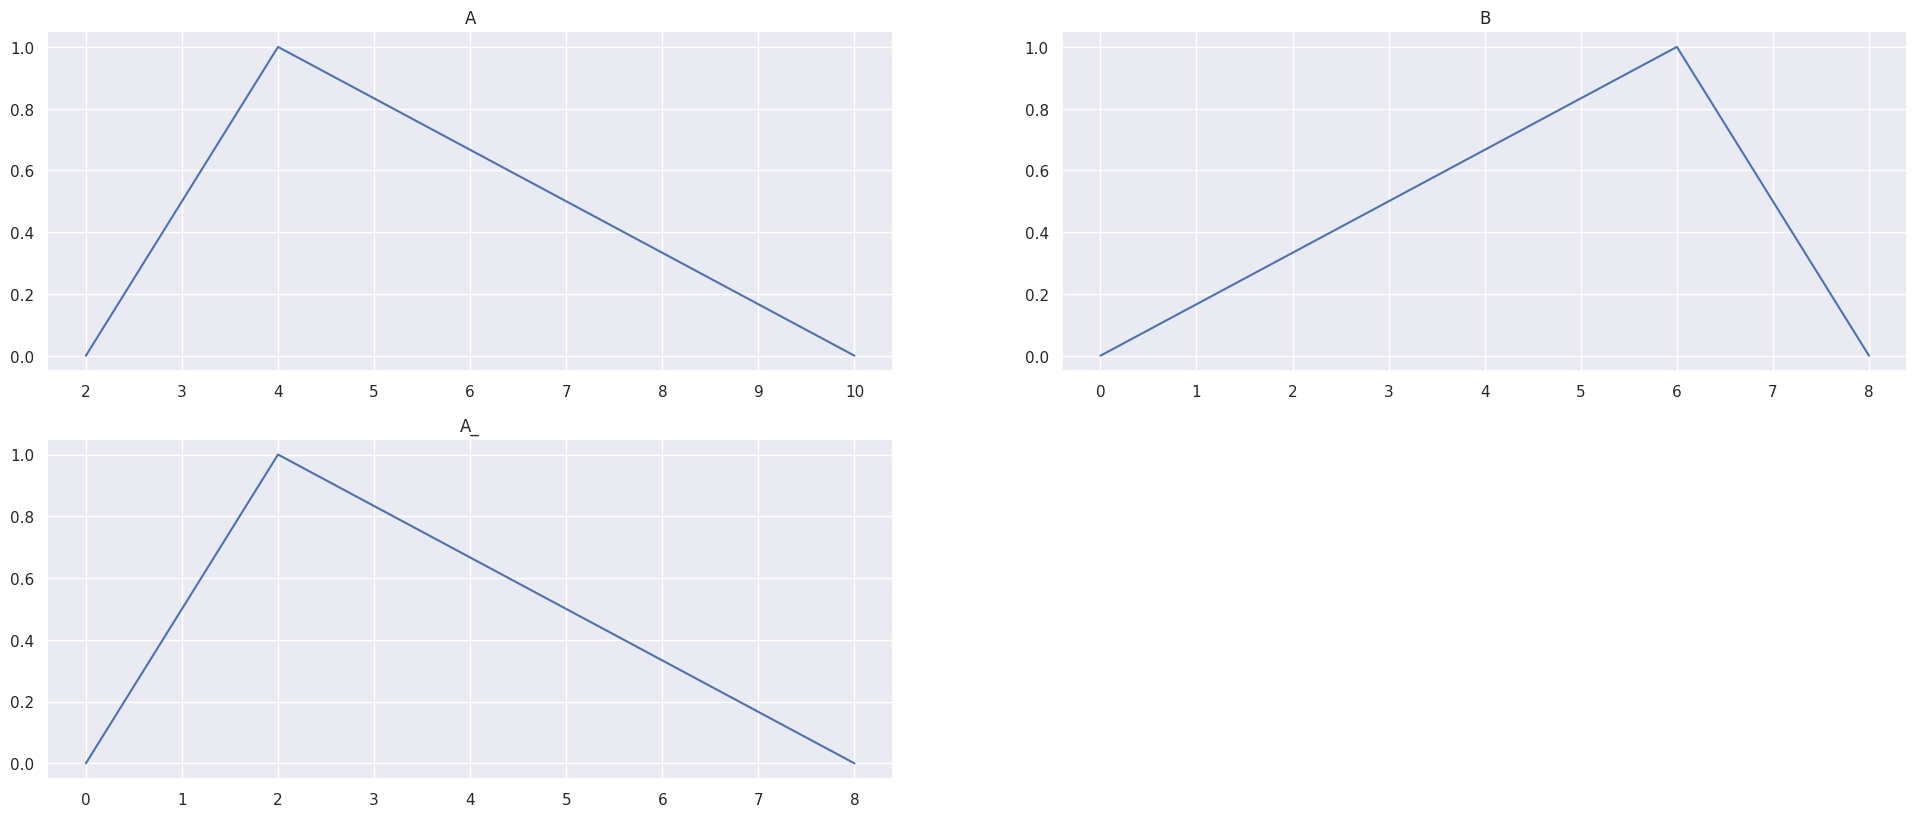

In [ ]:
visualisation_sefs(dict_test, taille_par_subplot_x = 8, taille_par_subplot_y=5)

In [ ]:
implication = f_implication(0,1)
interv = np.linspace(0,10,100)

result = MPG(A, B, A_, implication.luka, 'lukasiewick',interv)

In [ ]:
dict_test["Test de la fonction => B' "] = result

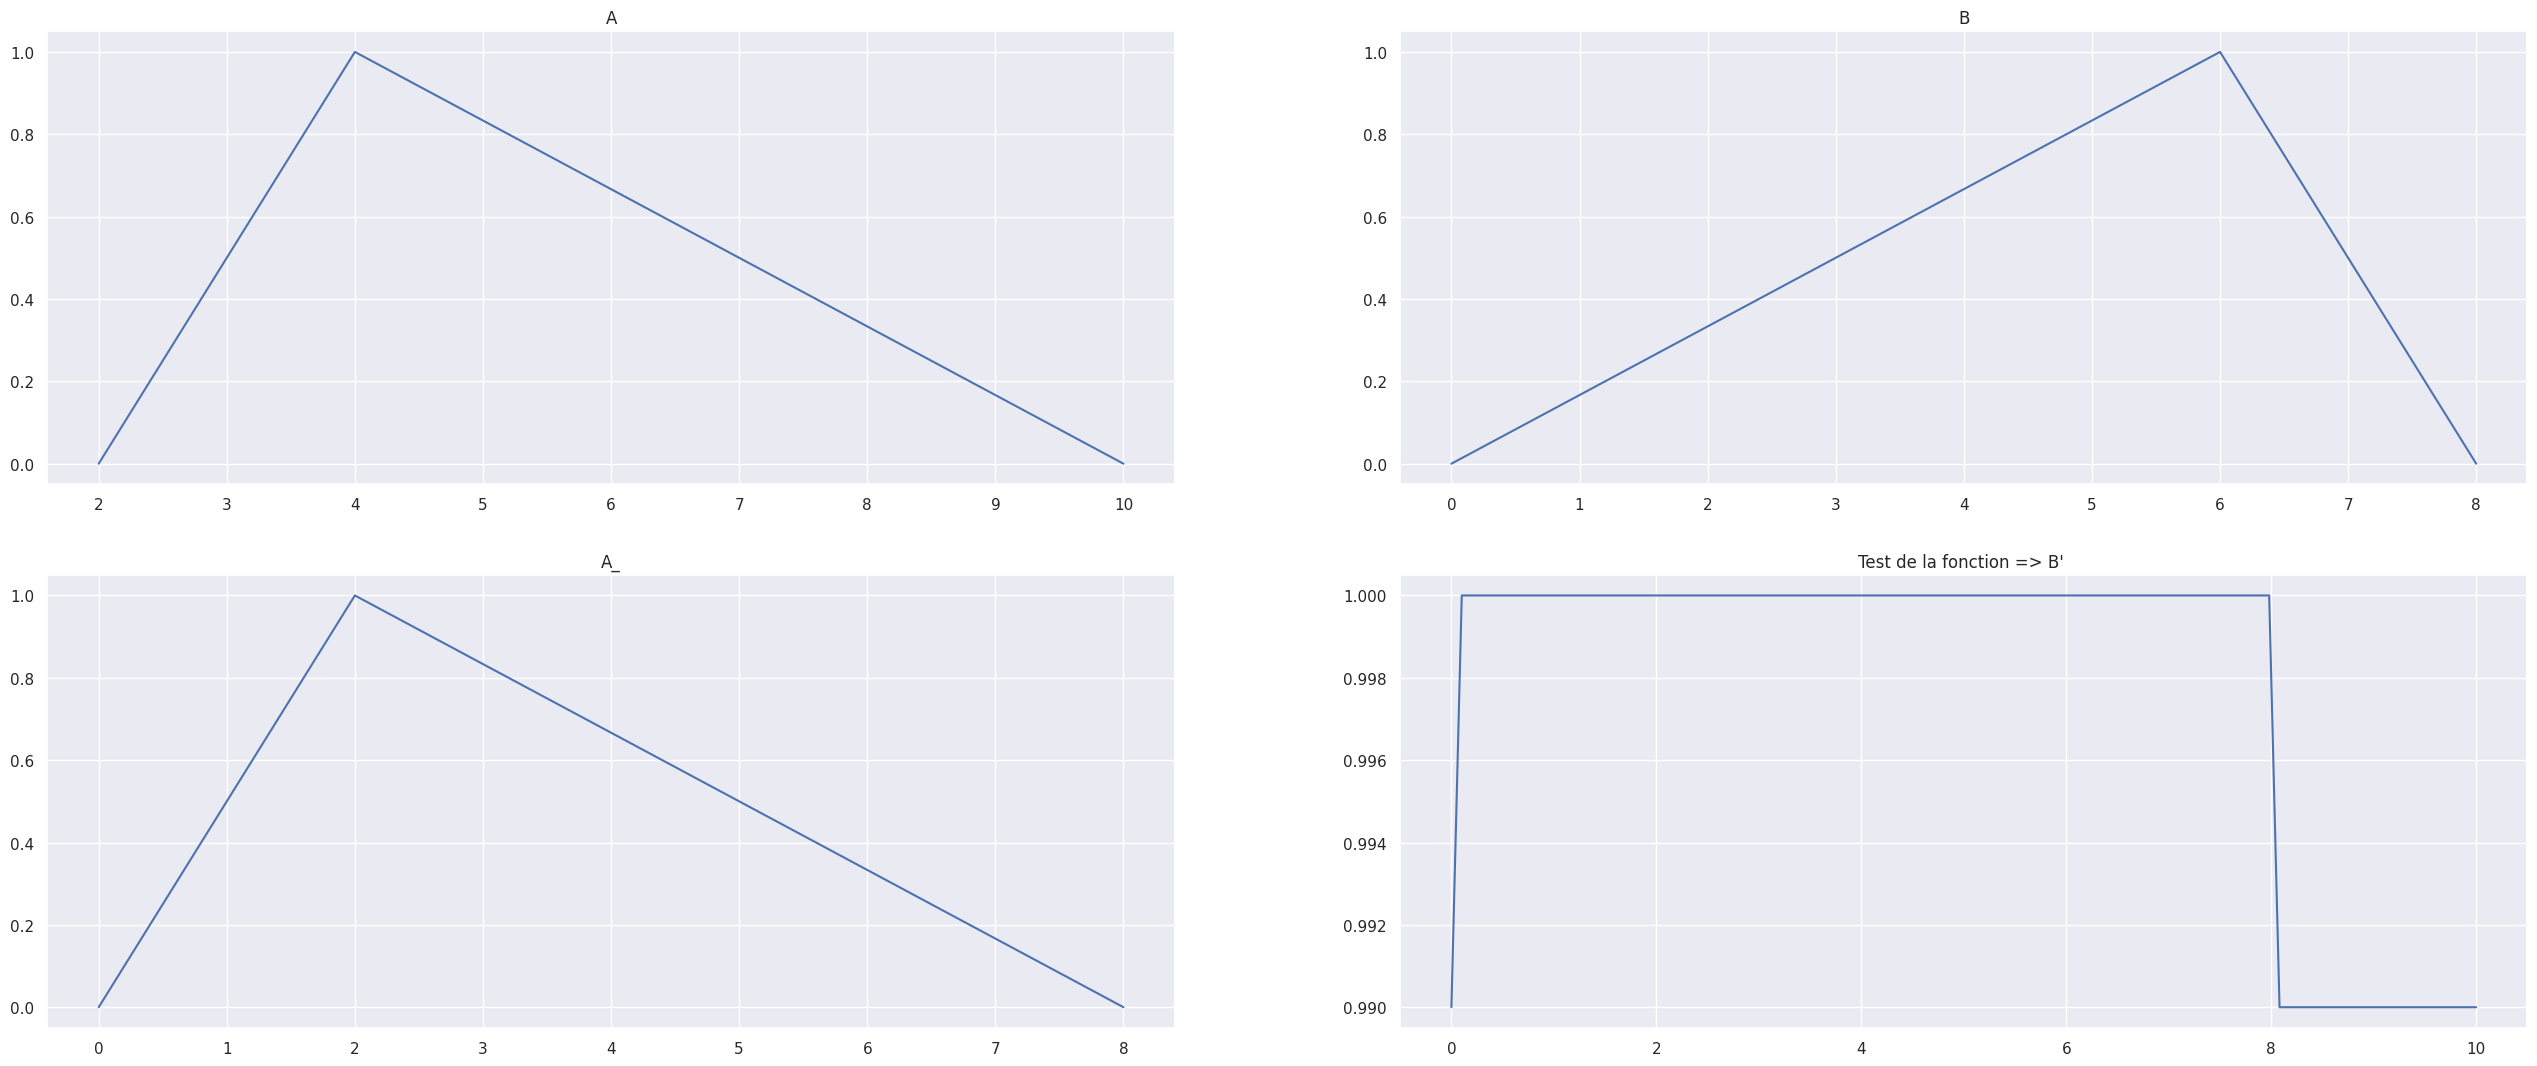

In [ ]:
visualisation_sefs(dict_test, taille_par_subplot_x = 8, taille_par_subplot_y=5)

In [ ]:
def plot_MPG(A, B, A_, names, liste_op_imp, T,interv):
    num_columns = 3  # Nombre de sous-graphiques par ligne
    num_rows = math.ceil(len(liste_op_imp) / num_columns)  # Calcul du nombre de lignes nécessaires

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 10))
    colors = ['blue', 'red']

    for i, op in enumerate(liste_op_imp):
        sef = [B]
        label = {str(B): "B"}

        res = MPG(A, B, A_, op, T,interv)
        label[str(res)] = "Résultat"
        sef.append(res)

        row = i // num_columns  # Calcul de la ligne actuelle
        col = i % num_columns  # Calcul de la colonne actuelle

        for j, s in enumerate(sef):
            x_s = [point[0] for point in s]
            y_s = [degre_appartenance(s, point) for point in x_s]
            axs[row, col].plot(x_s, y_s, color=colors[j], label=label[str(s)])
            axs[row, col].set_title(f"{names[i]}")
            axs[row, col].legend()

    plt.tight_layout()
    plt.show()


Exemple de visualisation

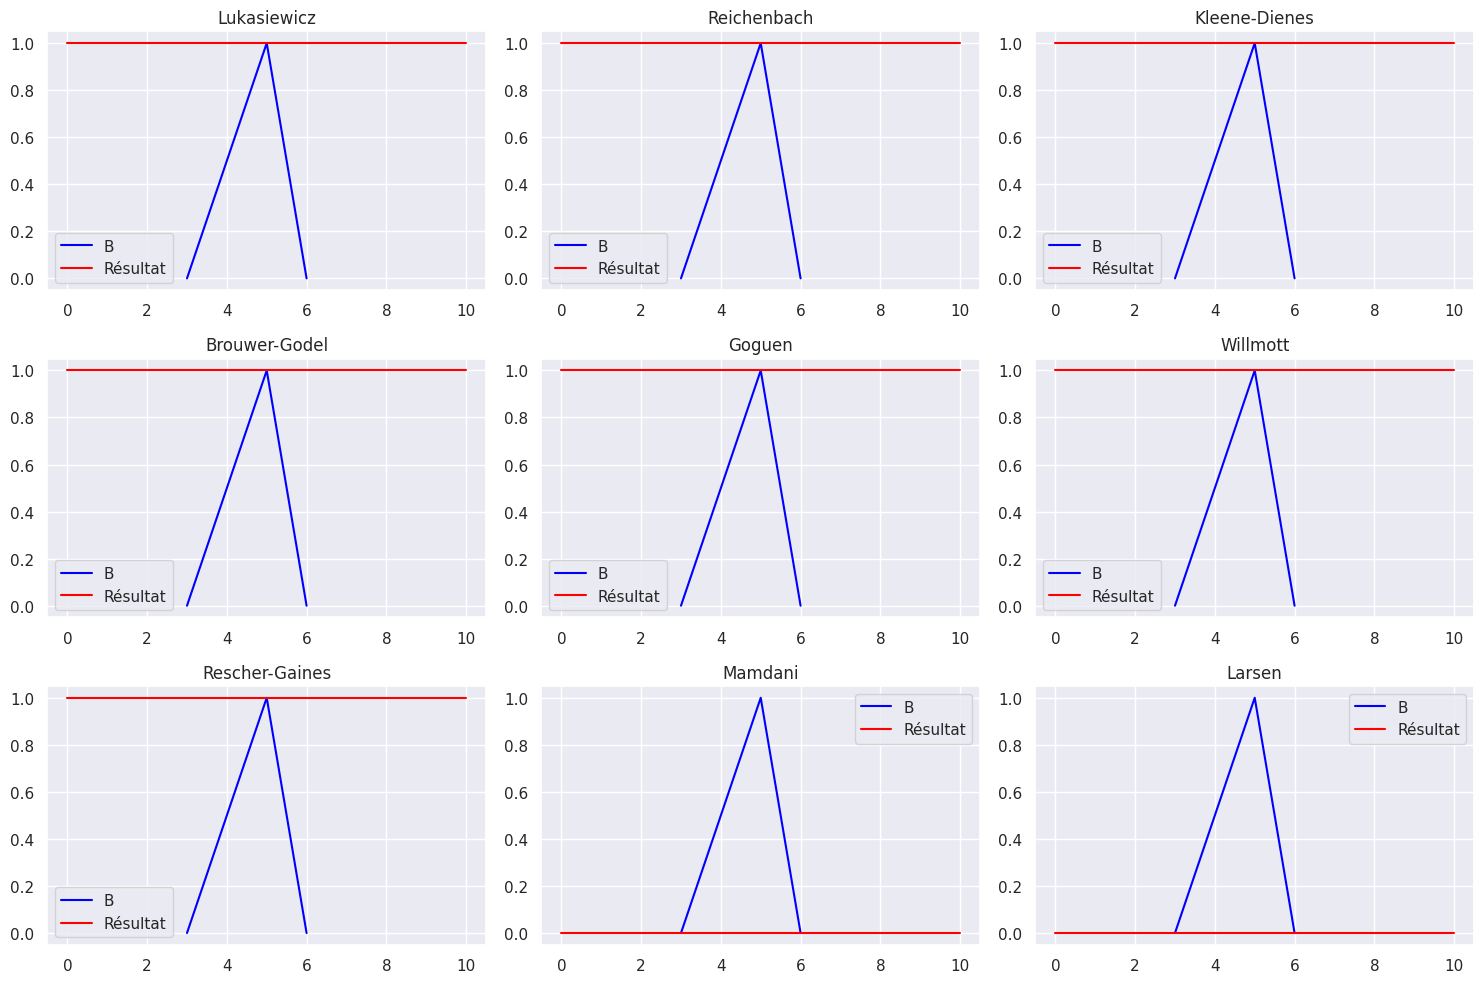

In [ ]:
A = [(1,0),(2,1),(4,0)]
B = [(3,0),(5,1),(6,0)]
A_ = [(2,0),(10,1),(15,0)]
interv = np.linspace(0,10,100)
names = ["Lukasiewicz","Reichenbach","Kleene-Dienes","Brouwer-Godel",
         "Goguen", "Willmott", "Rescher-Gaines","Mamdani","Larsen"]
implication = f_implication(0,1)
liste_op_imp = [implication.luka, implication.reichenbach,
                implication.kleen_d, implication.brower_godel,
                implication.goguen, implication.willmott,
                implication.rescher, implication.mamdani,
                implication.larsen]


plot_MPG(A,B,A_,names, liste_op_imp,'lukasiewick',interv)

### Résolution des exercices de TD

#### Exercice 2 : Implication floue de Kleene-Dienes
On considère les deux règles suivantes pour reconnaître le type de saké :
\begin{align}
R_1 : saké \,\,\,\, froid ⇒ Hiya\\
R_2 : saké \simeq 50^°C \Rightarrow Atsukan
 \end{align}
Les sous-ensembles flous sont définis sur l'univers X = [0,100]

Univers discret Y pour le type de saké : Y = ['a','h']
On considère les deux observations :
 - F1 : saké est exactement à 13°
 - F2 : saké est environ à 49,5°


In [ ]:
X = np.linspace(0,100,1000)
#Sous-ensembles flous
#A Froid ou pas

R1 = [(8,0),(10,1),(12,1),(15,0)]
#Environ x degrès
x = 50 #Par exemple
R2 = [(x-2,0),(x,1),(x+2,0)]

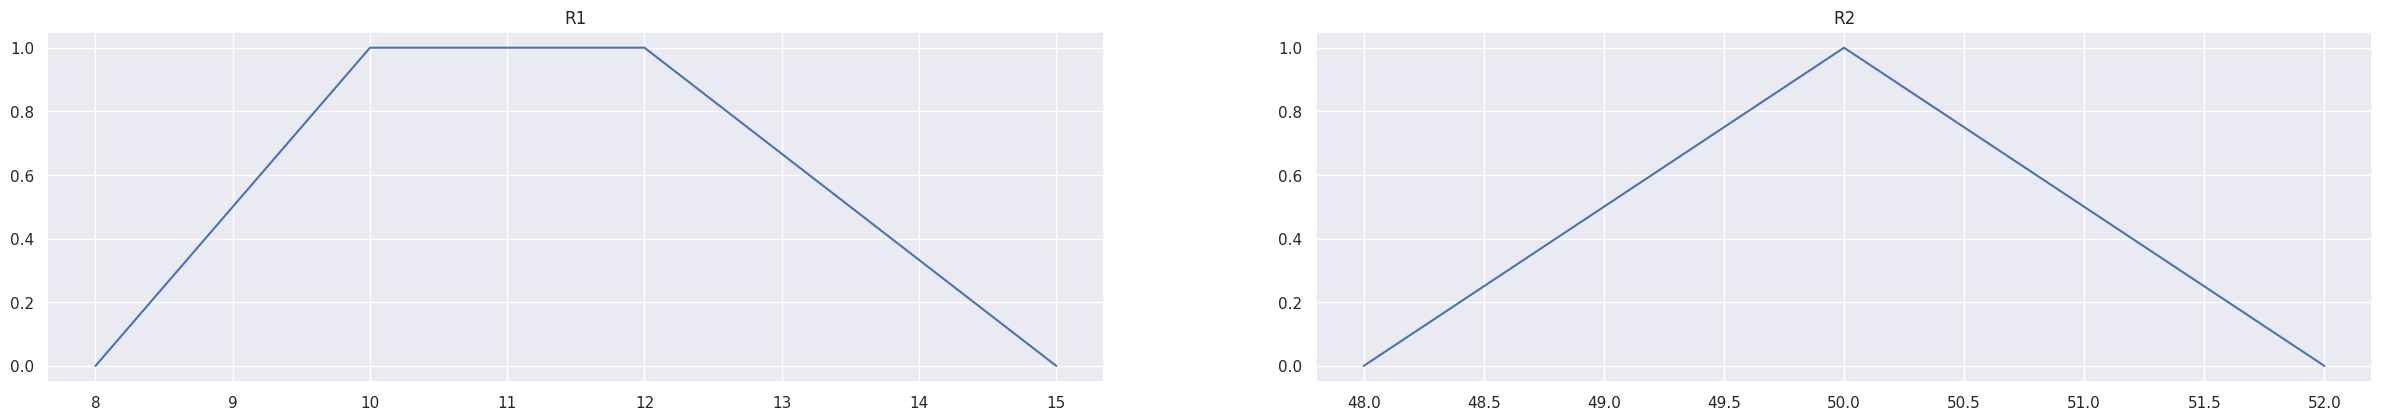

In [ ]:
dict_tstexo = {"R1" : R1,
               "R2" : R2}
visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)

On choisit l'implication floue de Kleene-Dienes.

1. L'opérateur du modus ponens généralisé qui doit être utilisé dans ce cas est : l'opérateur de Lukasiewicz

2. L'expression du sous-ensemble B' obtenu par la règle R1 pour une observation A' de fonction d'appartenance A' :    
\begin{align}
\forall y \in Y, f_{B^{'}}(y) = sup_{x \in X} T(f_{A^{'}}(x), F_{KD}(f_{A}(x),f_{B}(y)))
\end{align}
Avec T : opérateur de Lukasiewicz :
\begin{align}
T_L (u,v) = max(u+v-1,0)
\end{align}  
et F : fonction d'implication de kleene-Dienes :    
\begin{align}
F_{KD} (u,v) = max(1-u,v)
\end{align}

y discret, on a donc, premier cas    
\begin{align}
f_{B}(a) = 0 \,\, et\,\,\, f_{B}(h) = 1 \\
f_{B^{'}}(a) = sup_{x \in X} max(f_{A^{'}}(x) + max(1-f_{A}(x),0)-1,0)
            = sup_{x \in X} max(f_{A^{'}}(x) + 1-f_{A}(x)-1,0)
            = sup_{x \in X} max(f_{A^{'}}(x) -f_{A}(x),0)
\end{align}
Second cas :
\begin{align}
f_{B^{'}}(h) = sup_{x \in X} max(f_{A^{'}}(x) + max(1-f_{A}(x),1)-1,0)
            = sup_{x \in X} max(f_{A^{'}}(x) + 1-1,0)
            = sup_{x \in X} max(f_{A^{'}}(x) ,0)
\end{align}
et :
\begin{align}
f_{A^{'}}(x) =
\begin{cases}
1 \,\,\,\, x = 13\\
0  \,\,\, sinon
\end{cases}
\end{align}

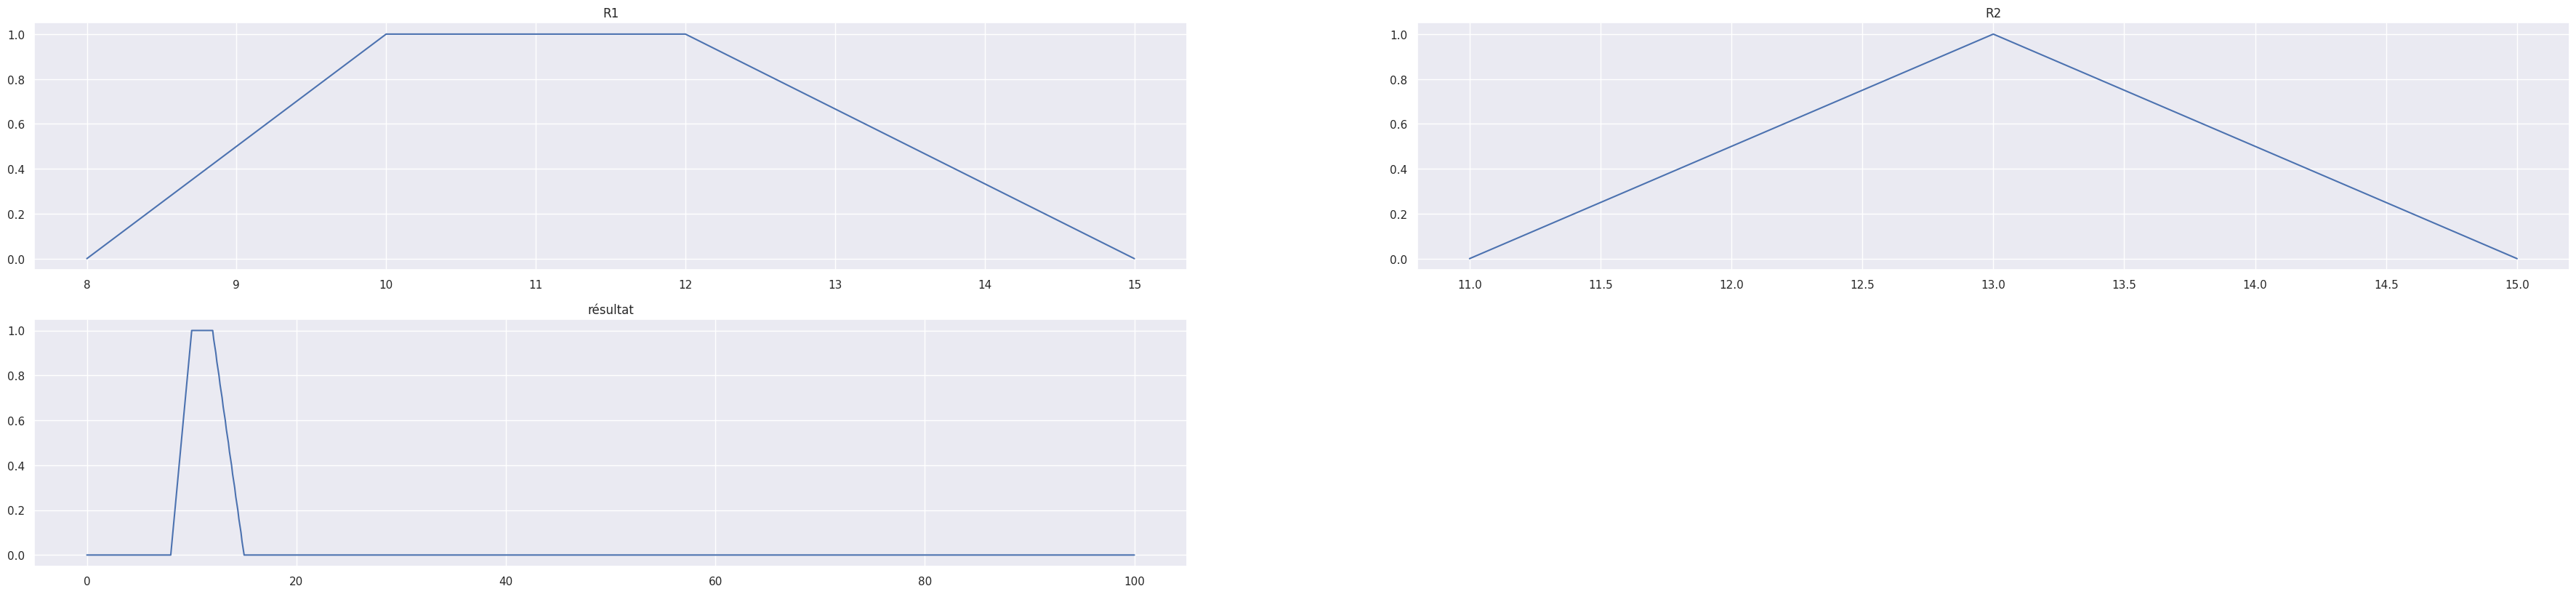

In [ ]:
#3. Règle R1, observation F1

F1 = 13
F2 = np.array([(47.5, 0), (49.5, 1), (51.5, 0)])


R1 = [(8,0),(10,1),(12,1),(15,0)]
R2 = [(F1-2,0),(F1,1),(F1+2,0)]
implication = f_implication(0,1)

dict_tstexo = {"R1" : R1,
               "R2" : R2}

dict_tstexo["résultat"] = MDP(R2,R1,F1,implication.kleen_d, "lukasiewick",X)
visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)


Comme prévu, on voit bien que Kleen_dienes colle à A, nous pouvons dire que le saké est froid, il est donc de type Hiya

il y a un chevauchement entre l'antécédent (saké froid) et l'observation F1.

Par conséquent, la conclusion serait "Hiya" avec un certain degré d'appartenance basé sur le chevauchement.

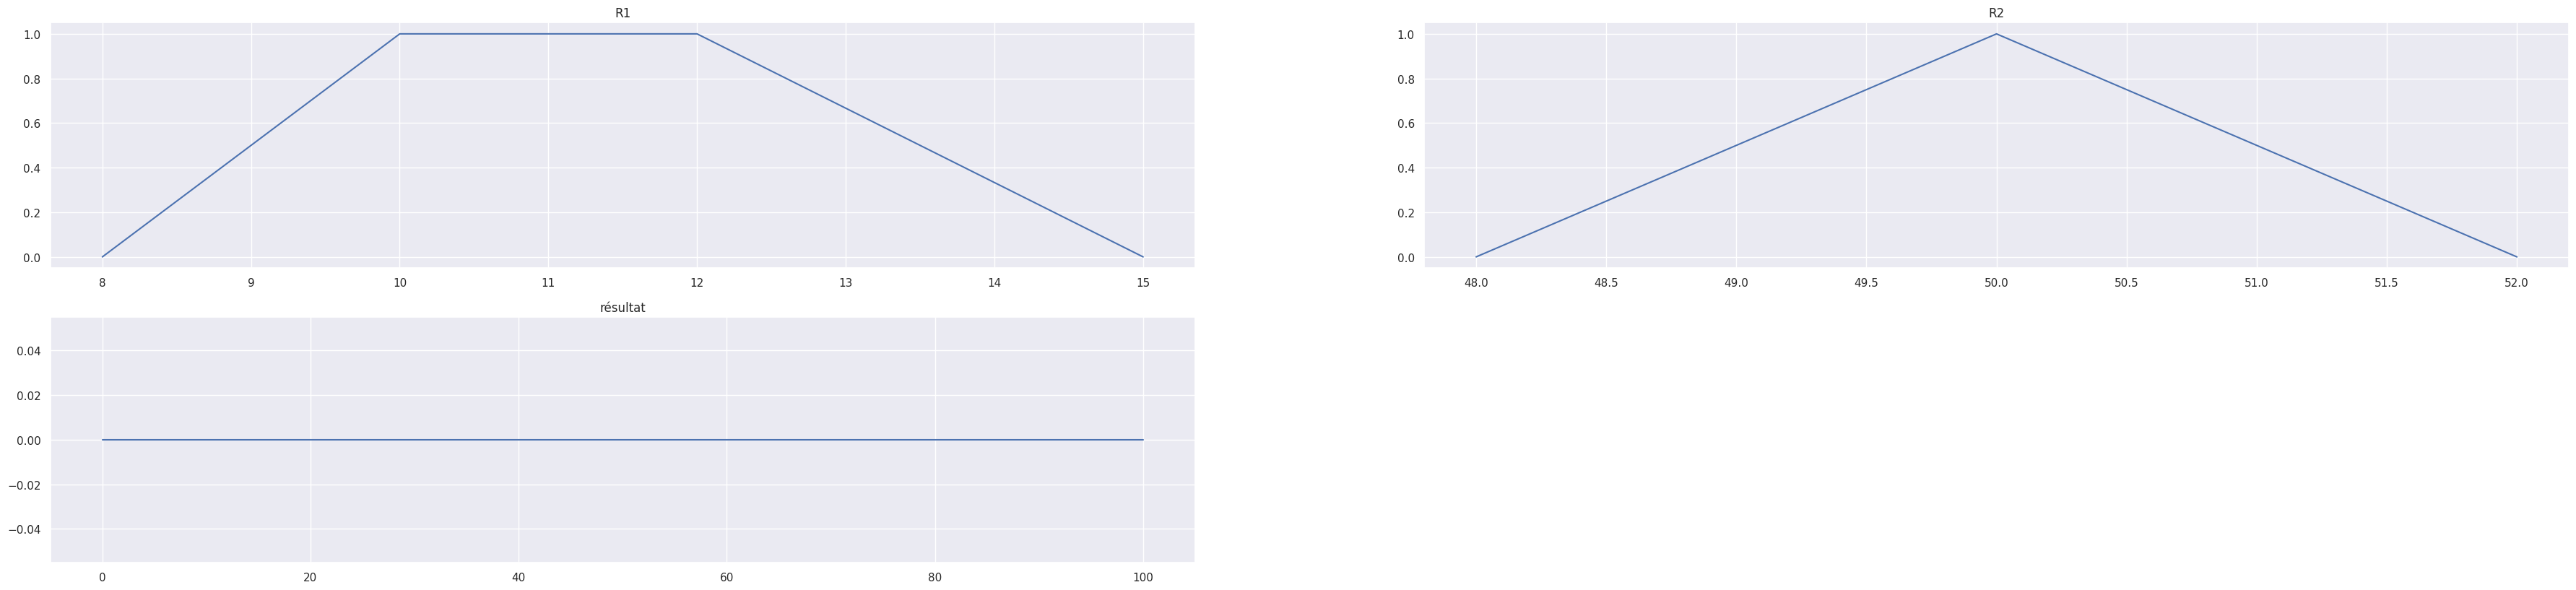

In [ ]:
#4. Règle R1, observation F2

F1 = 13
F2 = np.array([(47.5, 0), (49.5, 1), (51.5, 0)])


R1 = [(8,0),(10,1),(12,1),(15,0)]
R2 = [(48,0),(50,1),(52,0)]
implication = f_implication(0,1)

dict_tstexo = {"R1" : R1,
               "R2" : R2}

dict_tstexo["résultat"] = MPG(R1,R2,F2,implication.kleen_d, "lukasiewick",X)
visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)

4. Il n'y a pas de chevauchement entre l'antécédent (saké froid) et l'observation F2, et vu que Kleen_dienes colle aux données, alors nous ne pouvons pas dire que le saké est de type "Hiya", vu que la règle ne s'applique pas et vu que Y est un univers discret composé de 'h' ou 'a', alors nous déduisons que le saké est de type "Atsukan"

5. Enfin, si on considère l'observation : exactement 13°, et la règle R2. Il n'y a pas de chevauchement entre l'antécédent (saké à environ 50°) et l'observation F1.
La règle ne s'applique pas, nous ne pouvons pas dire que le saké est de type "Hiya", il est donc de type "Atsukan"

#### Exercice 3 : Implication floue de Goguen
On considère les deux règles suivantes pour reconnaître le type de saké :
\begin{align}
R_1 : trajet \,\,\,\, court ⇒ à \,\,l' heure\\
R_2 : trajet \,\,\,\, normal \Rightarrow à \,\,l' heure \,\,\,0.75
 \end{align}
Les sous-ensembles flous sont définis sur l'univers X = [0,30]

Univers discret Y pour le type de saké : Y = ['h','r']

On choisit l'implication floue de Goguen et l'opérateur de Lukasiewcicz


1. essayer de trouver les expressions nous-même à la main

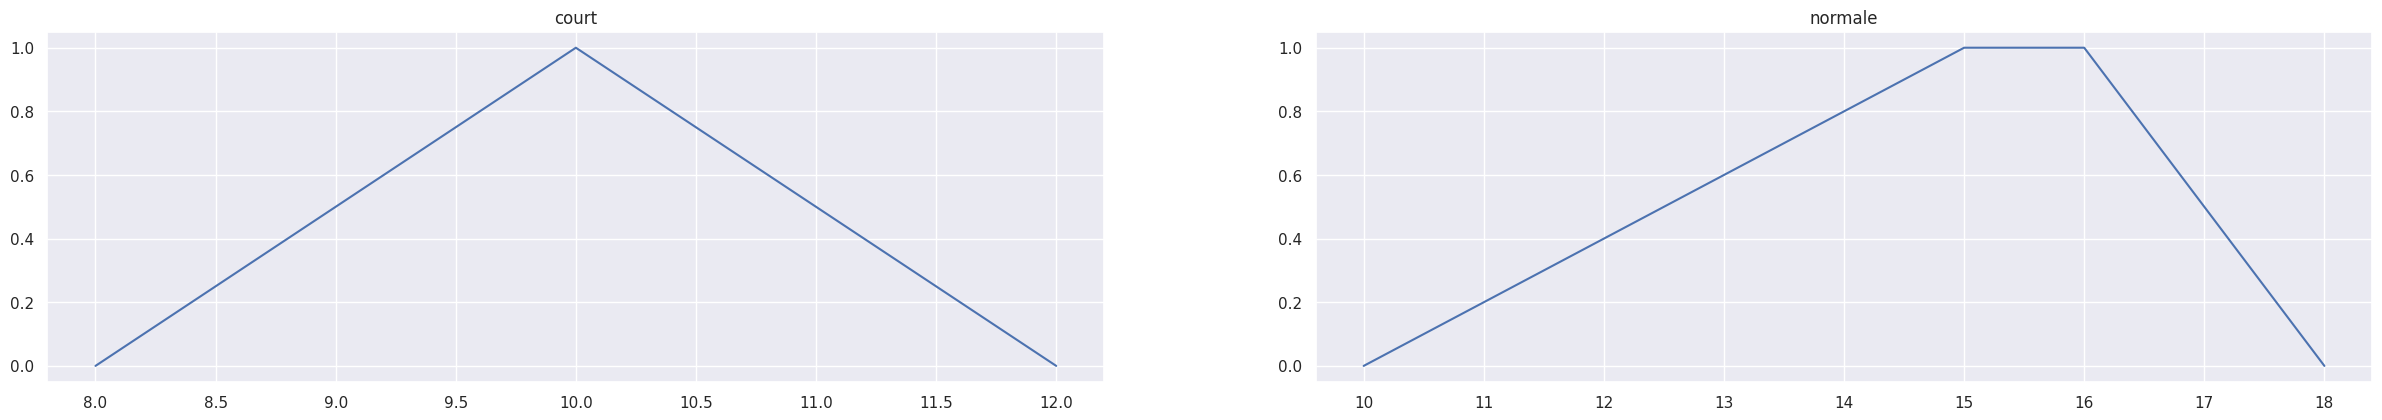

In [ ]:
X = np.linspace(0,31,1000)
court = [(8,0),(10,1),(12,0)]
normale = [(10,0),(15,1),(16,1),(18,0)]

dict_tstexo = {"court" : court,
               "normale" : normale}

visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)

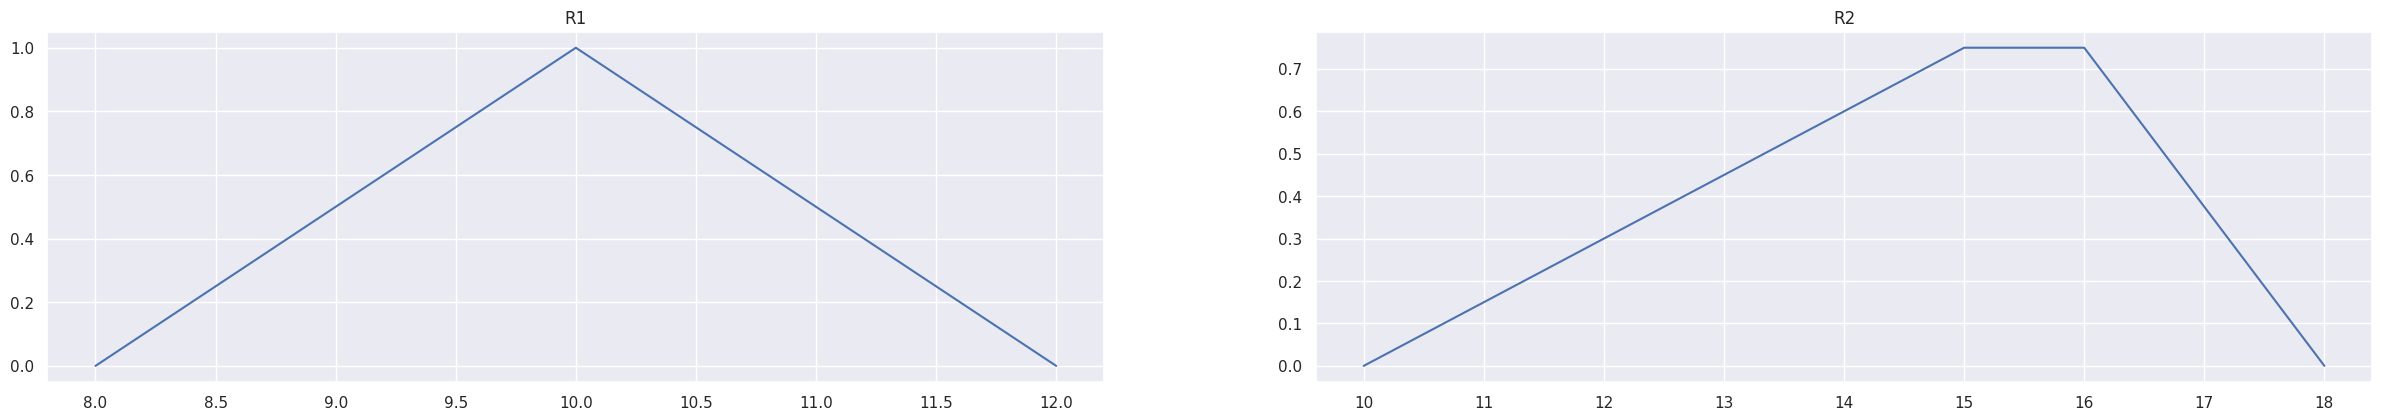

In [ ]:
R1 = court
R2 = [(point[0],np.minimum(point[1] *0.75,1)) for point in normale]

dict_tstexo = {"R1" : R1,
               "R2" : R2}
visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)

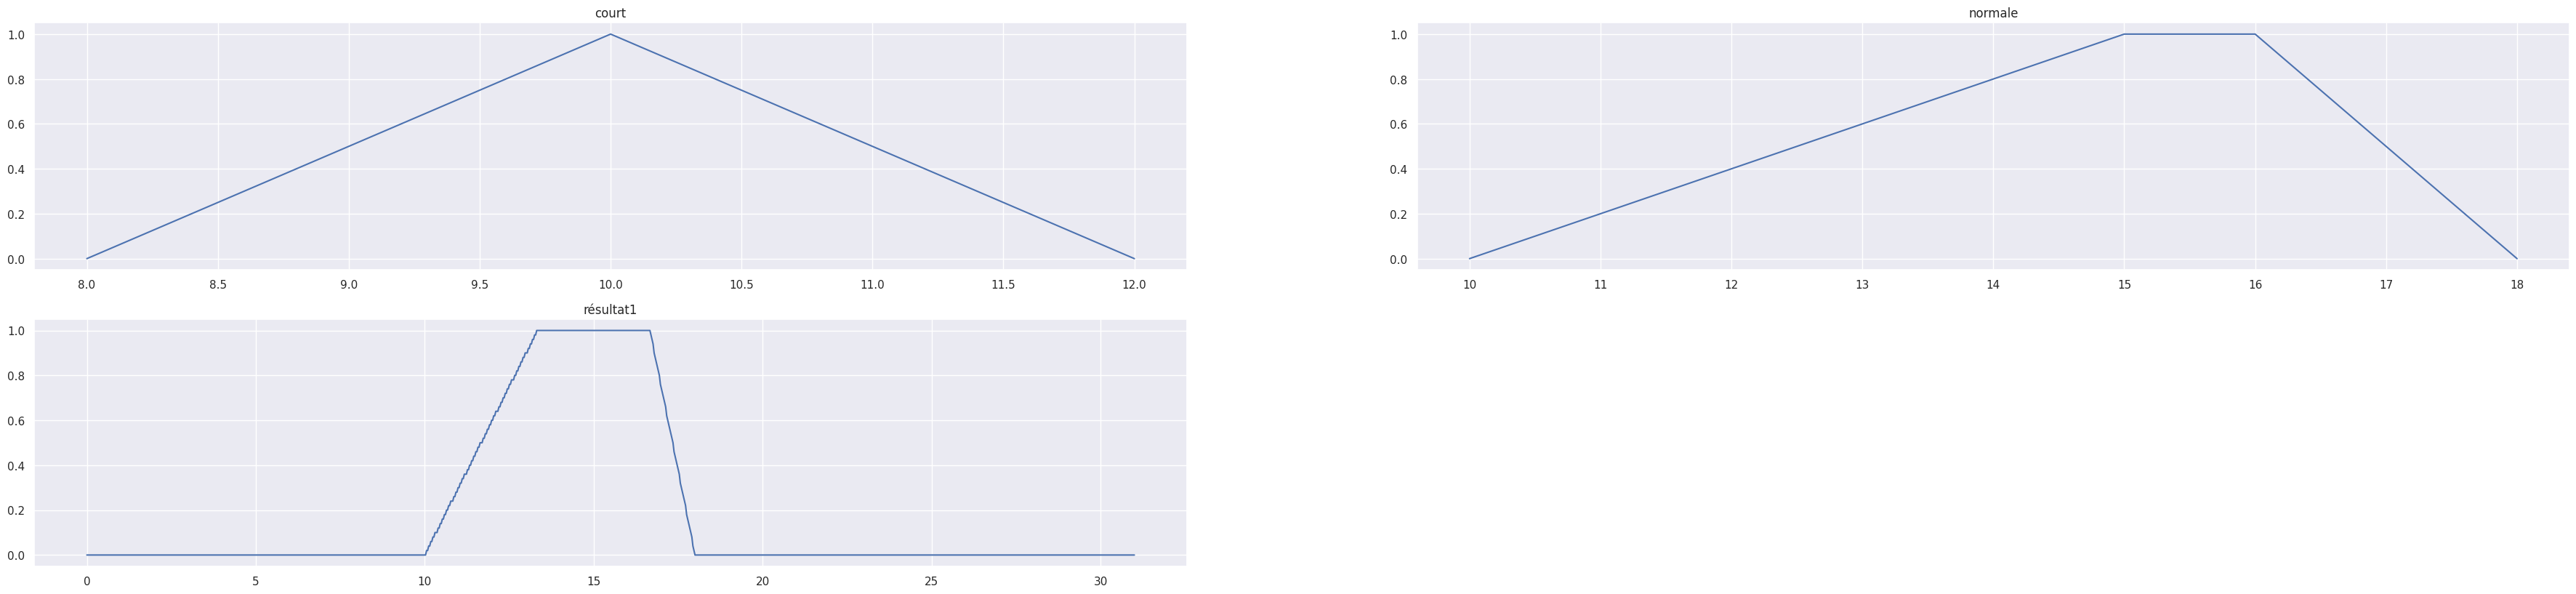

In [ ]:
implication = f_implication(0,1)
x_0 = 11
res1 = MDP(R1,R2,x_0,implication.goguen, "lukasiewick",X)
dict_tstexo["résultat1"] = res1
visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)

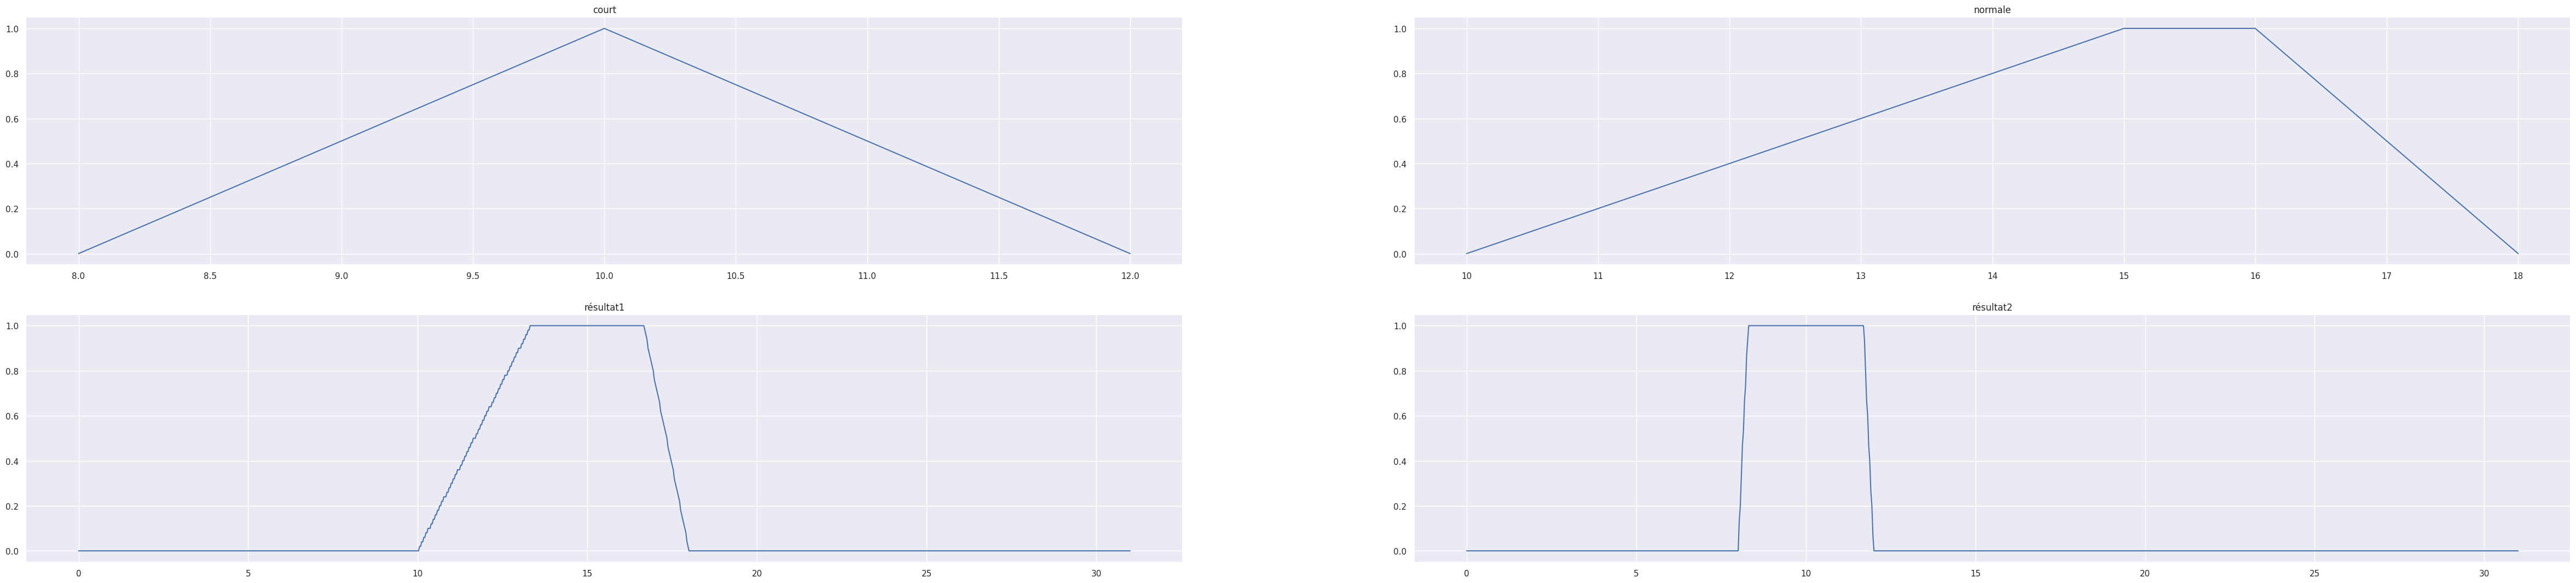

In [ ]:
res2 = MDP(R2,R1,x_0,implication.goguen, "lukasiewick",X)
dict_tstexo["résultat2"] = res2
visualisation_sefs(dict_tstexo, taille_par_subplot_x = 15, taille_par_subplot_y=5)